In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [326]:
path = 'D:\\Michael\\Data\\VolumePriceML\\'
file = 'SPX ln.csv'
df = pd.read_csv(path + file, parse_dates = ['Date/Time'], dayfirst = False)
df

Ticker  Date/Time     body   volume  change 1 year ago  \
0        SPX 1970-01-02  0.01016      NaN                NaN   
1        SPX 1970-01-05  0.00493      NaN                NaN   
2        SPX 1970-01-06 -0.00687      NaN                NaN   
3        SPX 1970-01-07 -0.00205      NaN                NaN   
4        SPX 1970-01-08  0.00054      NaN                NaN   
...      ...        ...      ...      ...                ...   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13434    SPX 2023-03-09 -0.02030  0.17769           -0.14099   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
0                      NaN                  NaN                 NaN   
1                      NaN                  NaN                 NaN   
2                      NaN                  NaN                 NaN   
3                      NaN                  NaN                 NaN   
4                      NaN                  NaN                 NaN   
...                    ...                  ...                 ...   
13433              0.01497              0.01454            -0.04218   
13434             -0.00704             -0.01827            -0.04967   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
0                    NaN             -0.00788               -0.24296   
1                    NaN             -0.01412               -0.24817   
2                    NaN             -0.01816               -0.25706   
3                    NaN             -0.00900               -0.26270   
4                    NaN             -0.00357               -0.23869   
...                  ...                  ...                    ...   
13433            0.01023             -0.01838               -0.01838   
13434           -0.01596              0.00025                0.00025   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  
0                   -0.03959              -0.08116             -0.00647  
1                   -0.05160              -0.07427             -0.01901  
2                   -0.04743              -0.07353             -0.00974  
3                   -0.04572              -0.07543             -0.01064  
4                   -0.04581              -0.07098             -0.01085  
...                      ...                   ...                  ...  
13433               -0.01838              -0.01838             -0.01838  
13434                0.00025               0.00025              0.00025  
13435                0.01483               0.01483              0.01483  
13436                0.01634               0.01634              0.01634  
13437                0.00000               0.00000              0.00000  

[13438 rows x 14 columns]

In [327]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
df

Ticker  Date/Time     body   volume  change 1 year ago  \
376      SPX 1971-06-28 -0.00255  3.04452            0.29336   
380      SPX 1971-07-02  0.00000  2.35893            0.32936   
395      SPX 1971-07-26 -0.00812  1.94894            0.23418   
404      SPX 1971-08-06  0.00170  2.32846            0.19852   
405      SPX 1971-08-09 -0.00767  1.82234            0.20492   
...      ...        ...      ...      ...                ...   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13434    SPX 2023-03-09 -0.02030  0.17769           -0.14099   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
376                0.07046             -0.02316            -0.01684   
380                0.09046             -0.00779            -0.01225   
395                0.02958             -0.05742             0.00010   
404               -0.02804             -0.08752            -0.06261   
405               -0.04106             -0.09021            -0.07376   
...                    ...                  ...                 ...   
13433              0.01497              0.01454            -0.04218   
13434             -0.00704             -0.01827            -0.04967   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
376             -0.00133              0.10232                0.03231   
380              0.01810              0.06818                0.02289   
395             -0.00802              0.08325                0.05462   
404             -0.01401              0.15580                0.10458   
405             -0.02565              0.16610                0.11434   
...                  ...                  ...                    ...   
13433            0.01023             -0.01838               -0.01838   
13434           -0.01596              0.00025                0.00025   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  
376                 -0.00123              -0.00688              0.02046  
380                 -0.00856              -0.05426              0.01037  
395                 -0.02654               0.02277             -0.02246  
404                  0.00571               0.07065              0.01516  
405                  0.00989               0.08020              0.05441  
...                      ...                   ...                  ...  
13433               -0.01838              -0.01838             -0.01838  
13434                0.00025               0.00025              0.00025  
13435                0.01483               0.01483              0.01483  
13436                0.01634               0.01634              0.01634  
13437                0.00000               0.00000              0.00000  

[4322 rows x 14 columns]

In [192]:
df['day'] = df['Date/Time'].dt.day
df['day_of_week'] = df['Date/Time'].dt.day_of_week
df['month'] = df['Date/Time'].dt.month
df


C:\Users\M1CCE~1.AST\AppData\Local\Temp/ipykernel_18444/2831339803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['Date/Time'].dt.day
C:\Users\M1CCE~1.AST\AppData\Local\Temp/ipykernel_18444/2831339803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['Date/Time'].dt.day_of_week
C:\Users\M1CCE~1.AST\AppData\Local\Temp/ipykernel_18444/2831339803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Ticker  Date/Time     body   volume  change 1 year ago  \
376      SPX 1971-06-28 -0.00255  3.04452            0.29336   
380      SPX 1971-07-02  0.00000  2.35893            0.32936   
395      SPX 1971-07-26 -0.00812  1.94894            0.23418   
404      SPX 1971-08-06  0.00170  2.32846            0.19852   
405      SPX 1971-08-09 -0.00767  1.82234            0.20492   
...      ...        ...      ...      ...                ...   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13434    SPX 2023-03-09 -0.02030  0.17769           -0.14099   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
376                0.07046             -0.02316            -0.01684   
380                0.09046             -0.00779            -0.01225   
395                0.02958             -0.05742             0.00010   
404               -0.02804             -0.08752            -0.06261   
405               -0.04106             -0.09021            -0.07376   
...                    ...                  ...                 ...   
13433              0.01497              0.01454            -0.04218   
13434             -0.00704             -0.01827            -0.04967   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
376             -0.00133              0.10232                0.03231   
380              0.01810              0.06818                0.02289   
395             -0.00802              0.08325                0.05462   
404             -0.01401              0.15580                0.10458   
405             -0.02565              0.16610                0.11434   
...                  ...                  ...                    ...   
13433            0.01023             -0.01838               -0.01838   
13434           -0.01596              0.00025                0.00025   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  day  \
376                 -0.00123              -0.00688              0.02046   28   
380                 -0.00856              -0.05426              0.01037    2   
395                 -0.02654               0.02277             -0.02246   26   
404                  0.00571               0.07065              0.01516    6   
405                  0.00989               0.08020              0.05441    9   
...                      ...                   ...                  ...  ...   
13433               -0.01838              -0.01838             -0.01838    8   
13434                0.00025               0.00025              0.00025    9   
13435                0.01483               0.01483              0.01483   10   
13436                0.01634               0.01634              0.01634   13   
13437                0.00000               0.00000              0.00000   14   

       day_of_week  month  
376              0      6  
380              4      7  
395              0      7  
404              4      8  
405              0      8  
...            ...    ...  
13433            2      3  
13434            3      3  
13435            4      3  
13436            0      3  
13437            1      3  

[4322 rows x 17 columns]

body   volume  change 1 year ago  change 6 months ago  \
376   -0.00255  3.04452            0.29336              0.07046   
380    0.00000  2.35893            0.32936              0.09046   
395   -0.00812  1.94894            0.23418              0.02958   
404    0.00170  2.32846            0.19852             -0.02804   
405   -0.00767  1.82234            0.20492             -0.04106   
...        ...      ...                ...                  ...   
13433  0.00112 -0.06696           -0.11112              0.01497   
13434 -0.02030  0.17769           -0.14099             -0.00704   
13435 -0.01317  0.38272           -0.14323             -0.01024   
13436  0.00537  0.55840           -0.15898             -0.00455   
13437  0.00647  0.37898           -0.14769              0.00496   

       change 3 months ago  change 1 month ago  change 1 week ago  \
376               -0.02316            -0.01684           -0.00133   
380               -0.00779            -0.01225            0.01810   
395               -0.05742             0.00010           -0.00802   
404               -0.08752            -0.06261           -0.01401   
405               -0.09021            -0.07376           -0.02565   
...                    ...                 ...                ...   
13433              0.01454            -0.04218            0.01023   
13434             -0.01827            -0.04967           -0.01596   
13435             -0.04012            -0.05539           -0.04656   
13436             -0.03556            -0.05909           -0.04876   
13437              0.00602            -0.05413           -0.01697   

       change 1 year later  change 6 months later  change 3 months later  \
376                0.10232                0.03231               -0.00123   
380                0.06818                0.02289               -0.00856   
395                0.08325                0.05462               -0.02654   
404                0.15580                0.10458                0.00571   
405                0.16610                0.11434                0.00989   
...                    ...                    ...                    ...   
13433             -0.01838               -0.01838               -0.01838   
13434              0.00025                0.00025                0.00025   
13435              0.01483                0.01483                0.01483   
13436              0.01634                0.01634                0.01634   
13437              0.00000                0.00000                0.00000   

       change 1 month later  change 1 week later  day  day_of_week  month  
376                -0.00688              0.02046   28            0      6  
380                -0.05426              0.01037    2            4      7  
395                 0.02277             -0.02246   26            0      7  
404                 0.07065              0.01516    6            4      8  
405                 0.08020              0.05441    9            0      8  
...                     ...                  ...  ...          ...    ...  
13433              -0.01838             -0.01838    8            2      3  
13434               0.00025              0.00025    9            3      3  
13435               0.01483              0.01483   10            4      3  
13436               0.01634              0.01634   13            0      3  
13437               0.00000              0.00000   14            1      3  

[4322 rows x 15 columns]

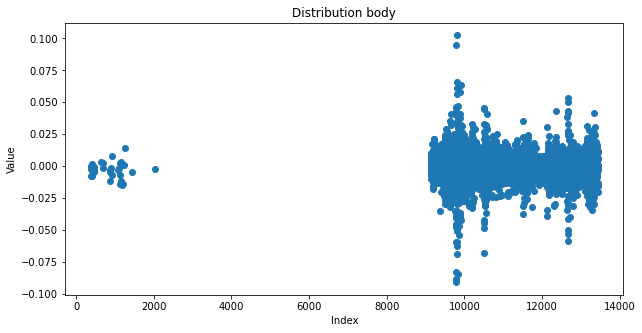

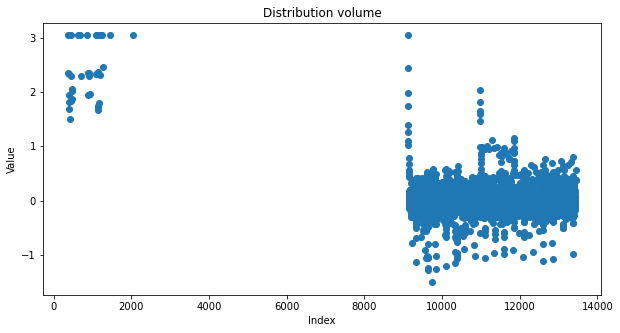

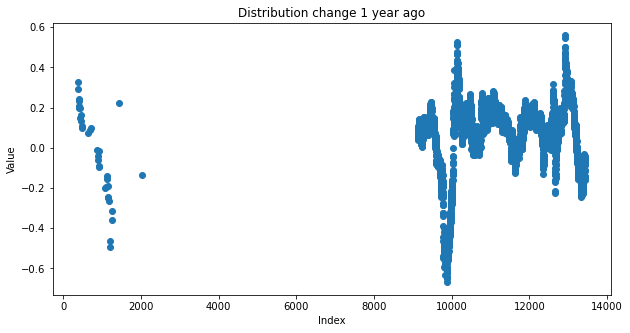

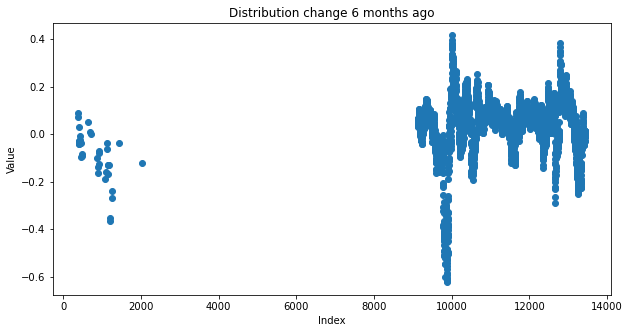

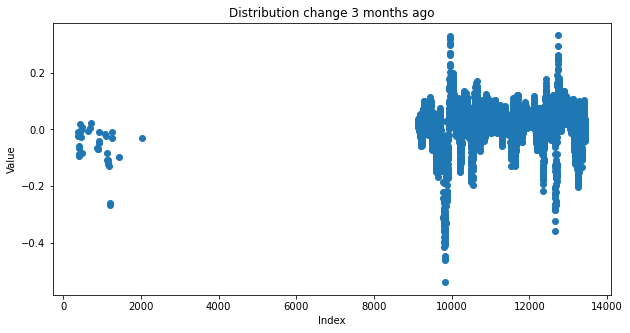

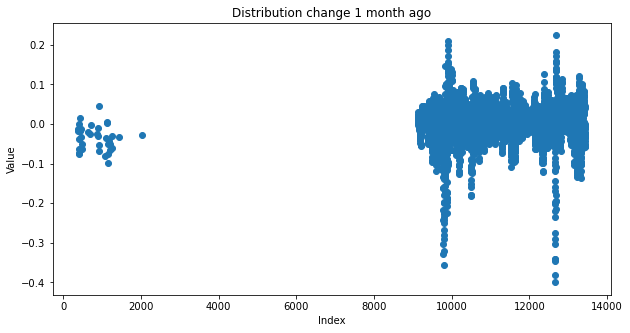

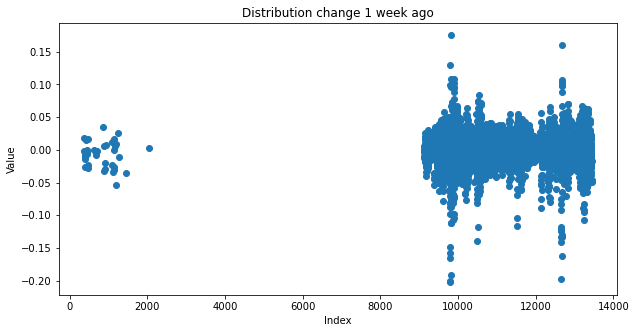

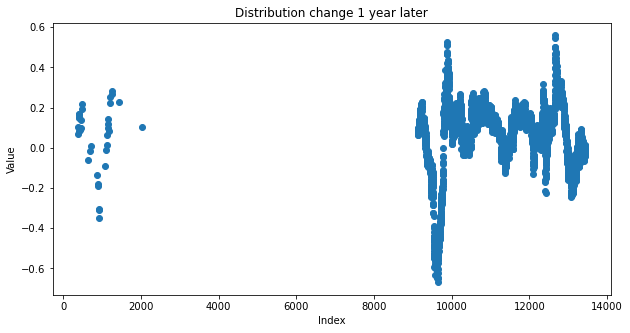

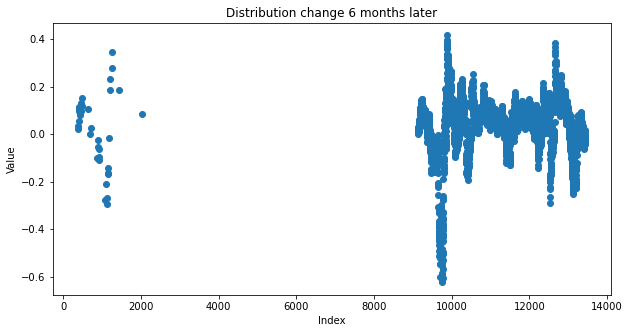

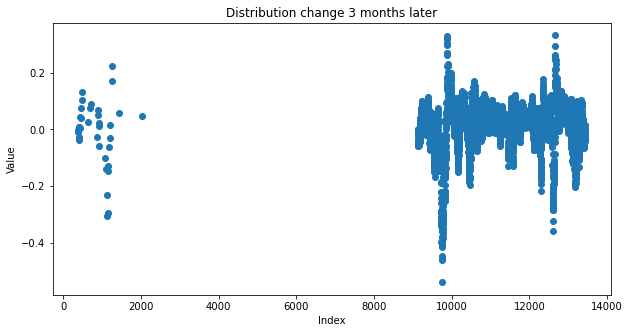

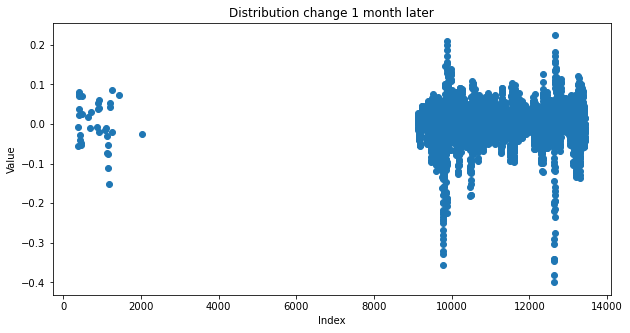

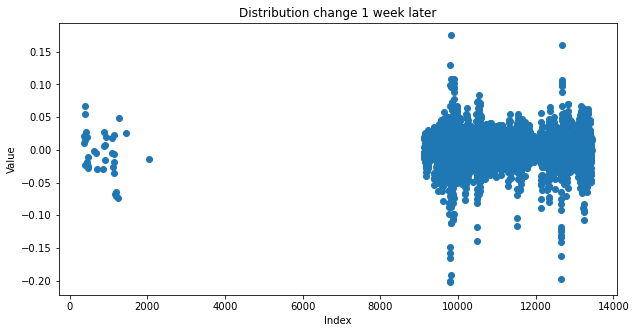

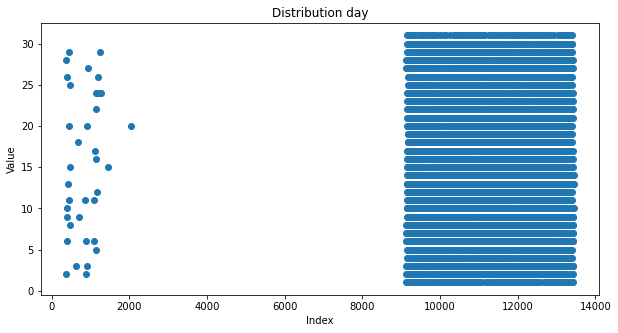

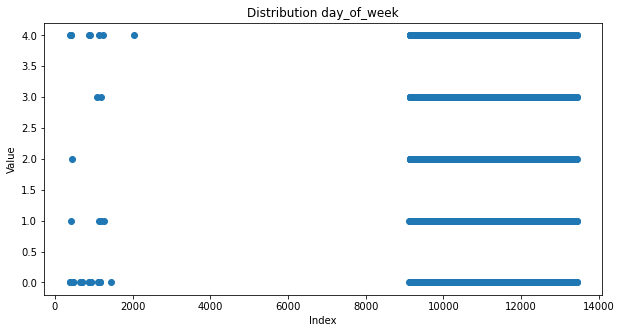

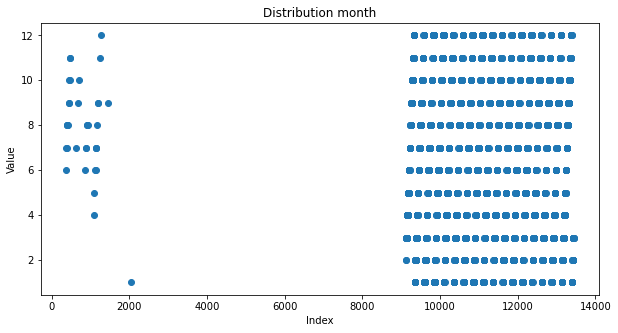

In [7]:
for i in df.columns:
    plt.figure(figsize=(10, 5))
    plt.scatter( df1.index, df1[i])
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.title(f'Distribution {i}');
    plt.show()

In [295]:
from scipy.stats import norm

def calculate_outliers(data, column):
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries
    
def calculate_outliers_norm(data, column):    

    dmin = data[column].mean() - 3 * data[column].std()
    dmax = data[column].mean() + 3 * data[column].std()
    boundaries = (dmin, dmax)
    
    return boundaries

In [291]:
for i in df.drop(columns=['Ticker', 'Date/Time']).columns:
    out = calculate_outliers_norm(df, i)
    df = df[(df[i] <= out[1]) & (df[i] >= out[0])]
df

Ticker  Date/Time     body   volume  change 1 year ago  \
9135     SPX 2006-03-09 -0.00489  0.78822            0.05263   
9136     SPX 2006-03-10  0.00720  0.68153            0.05797   
9137     SPX 2006-03-13  0.00199  0.56839            0.06769   
9138     SPX 2006-03-14  0.01034  0.52895            0.07243   
9139     SPX 2006-03-15  0.00426  0.50415            0.08424   
...      ...        ...      ...      ...                ...   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13434    SPX 2023-03-09 -0.02030  0.17769           -0.14099   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
9135               0.02860              0.00673             0.01381   
9136               0.03960              0.01895             0.01238   
9137               0.03378              0.02228             0.01597   
9138               0.04486              0.02981             0.02378   
9139               0.05670              0.03323             0.03131   
...                    ...                  ...                 ...   
13433              0.01497              0.01454            -0.04218   
13434             -0.00704             -0.01827            -0.04967   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
9135            -0.01320              0.10040                0.01698   
9136            -0.00452              0.07263                0.01356   
9137             0.00458              0.07718                0.01193   
9138             0.01679              0.07052                0.01189   
9139             0.01902              0.06242                0.01148   
...                  ...                  ...                    ...   
13433            0.01023             -0.01838               -0.01838   
13434           -0.01596              0.00025                0.00025   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  
9135                -0.01130               0.01813              0.02568  
9136                -0.02299               0.01179              0.01996  
9137                -0.03704               0.00190              0.01618  
9138                -0.05855              -0.00724             -0.00019  
9139                -0.05764              -0.01072              0.00155  
...                      ...                   ...                  ...  
13433               -0.01838              -0.01838             -0.01838  
13434                0.00025               0.00025              0.00025  
13435                0.01483               0.01483              0.01483  
13436                0.01634               0.01634              0.01634  
13437                0.00000               0.00000              0.00000  

[3542 rows x 14 columns]

In [296]:
for i in df.drop(columns=['Ticker', 'Date/Time']).columns:
    out = calculate_outliers_norm(df, i)
    df = df[(df[i] >= out[1]) | (df[i] <= out[0])]
df

Empty DataFrame
Columns: [Ticker, Date/Time, body, volume, change 1 year ago, change 6 months ago, change 3 months ago, change 1 month ago, change 1 week ago, change 1 year later, change 6 months later, change 3 months later, change 1 month later, change 1 week later]
Index: []

In [328]:
df1 = df.drop(columns=['Ticker', 'Date/Time'])

df1

body   volume  change 1 year ago  change 6 months ago  \
376   -0.00255  3.04452            0.29336              0.07046   
380    0.00000  2.35893            0.32936              0.09046   
395   -0.00812  1.94894            0.23418              0.02958   
404    0.00170  2.32846            0.19852             -0.02804   
405   -0.00767  1.82234            0.20492             -0.04106   
...        ...      ...                ...                  ...   
13433  0.00112 -0.06696           -0.11112              0.01497   
13434 -0.02030  0.17769           -0.14099             -0.00704   
13435 -0.01317  0.38272           -0.14323             -0.01024   
13436  0.00537  0.55840           -0.15898             -0.00455   
13437  0.00647  0.37898           -0.14769              0.00496   

       change 3 months ago  change 1 month ago  change 1 week ago  \
376               -0.02316            -0.01684           -0.00133   
380               -0.00779            -0.01225            0.01810   
395               -0.05742             0.00010           -0.00802   
404               -0.08752            -0.06261           -0.01401   
405               -0.09021            -0.07376           -0.02565   
...                    ...                 ...                ...   
13433              0.01454            -0.04218            0.01023   
13434             -0.01827            -0.04967           -0.01596   
13435             -0.04012            -0.05539           -0.04656   
13436             -0.03556            -0.05909           -0.04876   
13437              0.00602            -0.05413           -0.01697   

       change 1 year later  change 6 months later  change 3 months later  \
376                0.10232                0.03231               -0.00123   
380                0.06818                0.02289               -0.00856   
395                0.08325                0.05462               -0.02654   
404                0.15580                0.10458                0.00571   
405                0.16610                0.11434                0.00989   
...                    ...                    ...                    ...   
13433             -0.01838               -0.01838               -0.01838   
13434              0.00025                0.00025                0.00025   
13435              0.01483                0.01483                0.01483   
13436              0.01634                0.01634                0.01634   
13437              0.00000                0.00000                0.00000   

       change 1 month later  change 1 week later  
376                -0.00688              0.02046  
380                -0.05426              0.01037  
395                 0.02277             -0.02246  
404                 0.07065              0.01516  
405                 0.08020              0.05441  
...                     ...                  ...  
13433              -0.01838             -0.01838  
13434               0.00025              0.00025  
13435               0.01483              0.01483  
13436               0.01634              0.01634  
13437               0.00000              0.00000  

[4322 rows x 12 columns]

In [312]:

std_scaler = StandardScaler()
std_scaler.fit(df1)
std_scaled = std_scaler.transform(df1)

df1[df1.columns] = std_scaled
df1

body    volume  change 1 year ago  change 6 months ago  \
376   -0.239008  9.369361           1.331133             0.316770   
380   -0.011516  7.246231           1.544347             0.483697   
395   -0.735922  5.976578           0.980632            -0.024428   
404    0.140145  7.151872           0.769432            -0.505343   
405   -0.695776  5.584524           0.807337            -0.614013   
...         ...       ...                ...                  ...   
13433  0.088402 -0.266245          -1.064446            -0.146368   
13434 -1.822531  0.491386          -1.241354            -0.330070   
13435 -1.186445  1.126321          -1.254621            -0.356779   
13436  0.467556  1.670365          -1.347902            -0.309288   
13437  0.565689  1.114739          -1.281036            -0.229914   

       change 3 months ago  change 1 month ago  change 1 week ago  \
376              -0.482783           -0.443903          -0.100582   
380              -0.293642           -0.351643           0.663703   
395              -0.904382           -0.103404          -0.363736   
404              -1.274788           -1.363895          -0.599354   
405              -1.307890           -1.588013          -1.057217   
...                    ...                 ...                ...   
13433            -0.018852           -0.953245           0.354134   
13434            -0.422607           -1.103797          -0.676058   
13435            -0.691490           -1.218770          -1.879719   
13436            -0.635376           -1.293142          -1.966257   
13437            -0.123698           -1.193444          -0.715787   

       change 1 year later  change 6 months later  change 3 months later  \
376               0.228457              -0.005191              -0.212239   
380               0.026817              -0.083896              -0.302059   
395               0.115825               0.181211              -0.522380   
404               0.544324               0.598631              -0.127198   
405               0.605159               0.680176              -0.075978   
...                    ...                    ...                    ...   
13433            -0.484429              -0.428710              -0.422390   
13434            -0.374395              -0.273055              -0.194103   
13435            -0.288282              -0.151237              -0.015444   
13436            -0.279363              -0.138621               0.003059   
13437            -0.375872              -0.275143              -0.197167   

       change 1 month later  change 1 week later  
376               -0.247436             0.754524  
380               -1.199565             0.359006  
395                0.348397            -0.927899  
404                1.310574             0.546769  
405                1.502486             2.085331  
...                     ...                  ...  
13433             -0.478535            -0.767967  
13434             -0.104155            -0.037689  
13435              0.188839             0.533833  
13436              0.219183             0.593024  
13437             -0.109179            -0.047489  

[4322 rows x 12 columns]

In [329]:

std_scaler = MinMaxScaler()
std_scaler.fit(df1)
std_scaled = std_scaler.transform(df1)

df1[df1.columns] = std_scaled
df1

body    volume  change 1 year ago  change 6 months ago  \
376    0.457957  1.000000           0.783440             0.668118   
380    0.471120  0.849443           0.812721             0.687335   
395    0.429206  0.759408           0.735307             0.628836   
404    0.479895  0.842751           0.706303             0.573470   
405    0.431528  0.731606           0.711509             0.560959   
...         ...       ...                ...                  ...   
13433  0.476901  0.316711           0.454461             0.614798   
13434  0.366335  0.370437           0.430167             0.593649   
13435  0.403138  0.415462           0.428345             0.590574   
13436  0.498839  0.454042           0.415535             0.596041   
13437  0.504517  0.414640           0.424717             0.605179   

       change 3 months ago  change 1 month ago  change 1 week ago  \
376               0.593186            0.613967           0.533192   
380               0.610800            0.621322           0.584662   
395               0.553924            0.641113           0.515470   
404               0.519430            0.540622           0.499603   
405               0.516348            0.522755           0.468768   
...                    ...                 ...                ...   
13433             0.636390            0.573361           0.563815   
13434             0.598790            0.561358           0.494437   
13435             0.573750            0.552192           0.413377   
13436             0.578976            0.546263           0.407550   
13437             0.626626            0.554211           0.491762   

       change 1 year later  change 6 months later  change 3 months later  \
376               0.628060               0.631460               0.618317   
380               0.600293               0.622408               0.609917   
395               0.612550               0.652897               0.589313   
404               0.671558               0.700903               0.626271   
405               0.679935               0.710282               0.631061   
...                    ...                    ...                    ...   
13433             0.529890               0.582752               0.598664   
13434             0.545043               0.600653               0.620014   
13435             0.556901               0.614663               0.636722   
13436             0.558129               0.616114               0.638452   
13437             0.544839               0.600413               0.619727   

       change 1 month later  change 1 week later  
376                0.629928             0.590914  
380                0.554003             0.564185  
395                0.677441             0.477219  
404                0.754166             0.576874  
405                0.769470             0.680848  
...                     ...                  ...  
13433              0.611499             0.488026  
13434              0.641353             0.537377  
13435              0.664717             0.576000  
13436              0.667137             0.580000  
13437              0.640953             0.536715  

[4322 rows x 12 columns]

In [14]:
df1.columns

Index(['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later', 'day', 'day_of_week',
       'month'],
      dtype='object')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

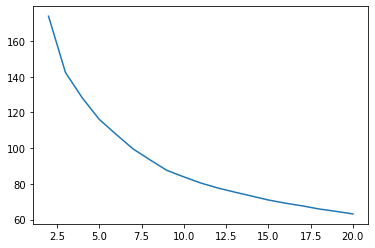

In [330]:
x = df1[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago']]
n_clusters = list(range(2, 21))

metrics = []

for k in n_clusters:
    print(k)
    km2 = KMeans(n_clusters=k).fit(x)
    metrics.append(km2.inertia_)

sns.lineplot(n_clusters, metrics)

In [331]:
km = KMeans(n_clusters=6).fit(x)
labels = km.labels_



C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 2


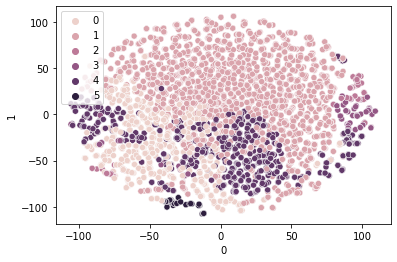

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 4


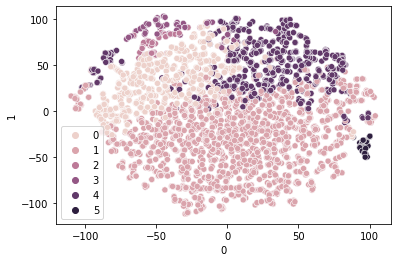

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 6


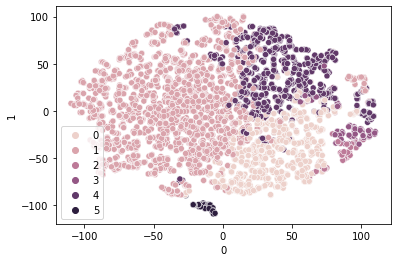

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 8


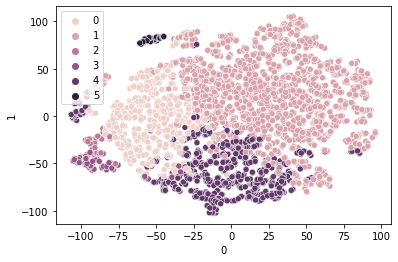

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 10


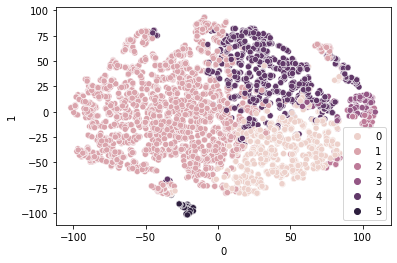

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 12


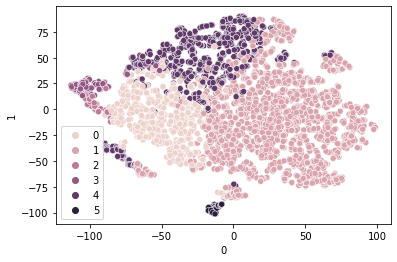

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 14


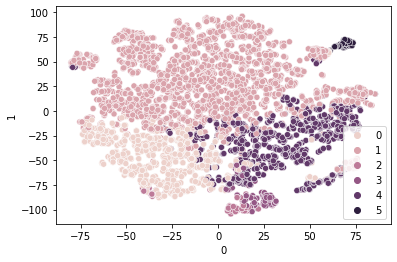

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 16


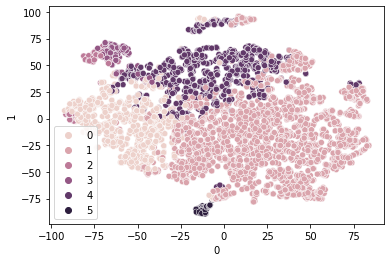

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 18


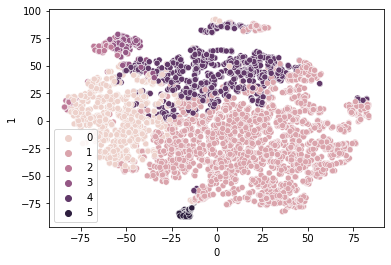

In [316]:
for i in range(2, 20, 2):
    
    tsne = TSNE(n_components=2, perplexity=i)
    df_emb = tsne.fit_transform(x)
    data = pd.DataFrame(df_emb)
    sns.scatterplot(data[0], data[1], hue=labels)
    print ('perplexity = ' + str(i))
    plt.show()

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


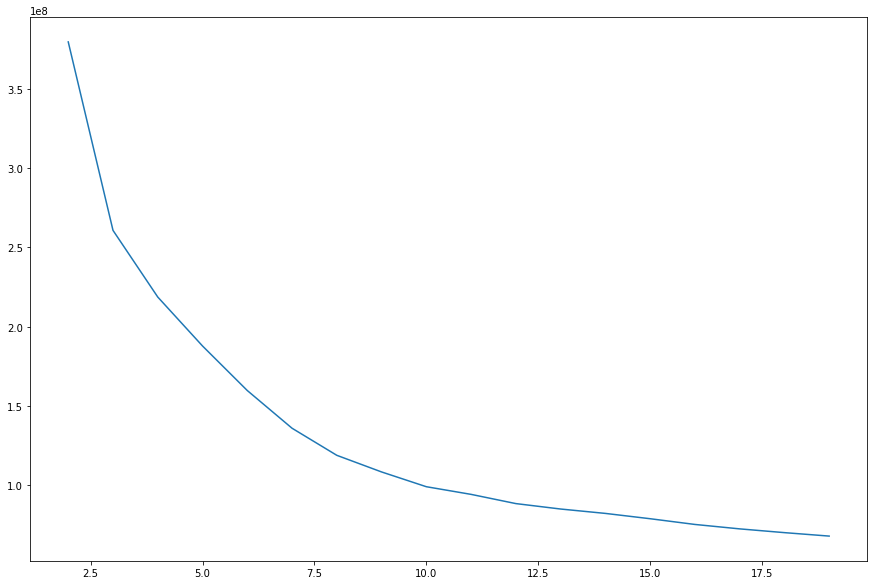

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(n_clusters, metrics)
plt.show()

In [332]:
km = KMeans(n_clusters=6)


km.fit(x)

points = km.predict(x)
labels = km.labels_
km.inertia_

106.76137561321275

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='body', ylabel='volume'>

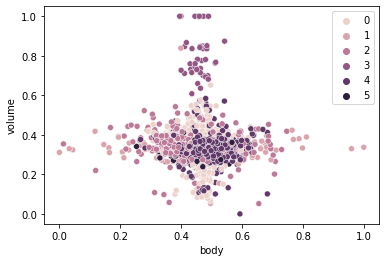

In [333]:
sns.scatterplot(df1['body'], df1['volume'], hue=points)

In [319]:
df['color'] = np.array(labels)
df

C:\Users\M1CCE~1.AST\AppData\Local\Temp/ipykernel_18444/2631536252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = np.array(labels)


Ticker  Date/Time     body   volume  change 1 year ago  \
376      SPX 1971-06-28 -0.00255  3.04452            0.29336   
380      SPX 1971-07-02  0.00000  2.35893            0.32936   
395      SPX 1971-07-26 -0.00812  1.94894            0.23418   
404      SPX 1971-08-06  0.00170  2.32846            0.19852   
405      SPX 1971-08-09 -0.00767  1.82234            0.20492   
...      ...        ...      ...      ...                ...   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13434    SPX 2023-03-09 -0.02030  0.17769           -0.14099   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
376                0.07046             -0.02316            -0.01684   
380                0.09046             -0.00779            -0.01225   
395                0.02958             -0.05742             0.00010   
404               -0.02804             -0.08752            -0.06261   
405               -0.04106             -0.09021            -0.07376   
...                    ...                  ...                 ...   
13433              0.01497              0.01454            -0.04218   
13434             -0.00704             -0.01827            -0.04967   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
376             -0.00133              0.10232                0.03231   
380              0.01810              0.06818                0.02289   
395             -0.00802              0.08325                0.05462   
404             -0.01401              0.15580                0.10458   
405             -0.02565              0.16610                0.11434   
...                  ...                  ...                    ...   
13433            0.01023             -0.01838               -0.01838   
13434           -0.01596              0.00025                0.00025   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  color  
376                 -0.00123              -0.00688              0.02046      5  
380                 -0.00856              -0.05426              0.01037      5  
395                 -0.02654               0.02277             -0.02246      5  
404                  0.00571               0.07065              0.01516      5  
405                  0.00989               0.08020              0.05441      5  
...                      ...                   ...                  ...    ...  
13433               -0.01838              -0.01838             -0.01838      2  
13434                0.00025               0.00025              0.00025      3  
13435                0.01483               0.01483              0.01483      3  
13436                0.01634               0.01634              0.01634      3  
13437                0.00000               0.00000              0.00000      3  

[4322 rows x 15 columns]

In [334]:
df1['color'] = np.array(labels)
# x = df1[['body', 'volume', 'change 1 year ago', 
#        'change 1 year later', 'color']]
# x
df1

body    volume  change 1 year ago  change 6 months ago  \
376    0.457957  1.000000           0.783440             0.668118   
380    0.471120  0.849443           0.812721             0.687335   
395    0.429206  0.759408           0.735307             0.628836   
404    0.479895  0.842751           0.706303             0.573470   
405    0.431528  0.731606           0.711509             0.560959   
...         ...       ...                ...                  ...   
13433  0.476901  0.316711           0.454461             0.614798   
13434  0.366335  0.370437           0.430167             0.593649   
13435  0.403138  0.415462           0.428345             0.590574   
13436  0.498839  0.454042           0.415535             0.596041   
13437  0.504517  0.414640           0.424717             0.605179   

       change 3 months ago  change 1 month ago  change 1 week ago  \
376               0.593186            0.613967           0.533192   
380               0.610800            0.621322           0.584662   
395               0.553924            0.641113           0.515470   
404               0.519430            0.540622           0.499603   
405               0.516348            0.522755           0.468768   
...                    ...                 ...                ...   
13433             0.636390            0.573361           0.563815   
13434             0.598790            0.561358           0.494437   
13435             0.573750            0.552192           0.413377   
13436             0.578976            0.546263           0.407550   
13437             0.626626            0.554211           0.491762   

       change 1 year later  change 6 months later  change 3 months later  \
376               0.628060               0.631460               0.618317   
380               0.600293               0.622408               0.609917   
395               0.612550               0.652897               0.589313   
404               0.671558               0.700903               0.626271   
405               0.679935               0.710282               0.631061   
...                    ...                    ...                    ...   
13433             0.529890               0.582752               0.598664   
13434             0.545043               0.600653               0.620014   
13435             0.556901               0.614663               0.636722   
13436             0.558129               0.616114               0.638452   
13437             0.544839               0.600413               0.619727   

       change 1 month later  change 1 week later  color  
376                0.629928             0.590914      3  
380                0.554003             0.564185      3  
395                0.677441             0.477219      3  
404                0.754166             0.576874      3  
405                0.769470             0.680848      3  
...                     ...                  ...    ...  
13433              0.611499             0.488026      4  
13434              0.641353             0.537377      2  
13435              0.664717             0.576000      2  
13436              0.667137             0.580000      2  
13437              0.640953             0.536715      2  

[4322 rows x 13 columns]

In [335]:
features = df1.drop(columns=['color']).columns

df_g = df1.groupby('color').agg({x: ['mean'] for x in features}).T
df_g

color                              0         1         2         3         4  \
body                  mean  0.474590  0.458455  0.445760  0.458740  0.476492   
volume                mean  0.329669  0.331282  0.345865  0.826725  0.326936   
change 1 year ago     mean  0.685782  0.133570  0.491150  0.564211  0.579495   
change 6 months ago   mean  0.700300  0.194619  0.506678  0.556277  0.603711   
change 3 months ago   mean  0.684747  0.367095  0.519150  0.580966  0.622639   
change 1 month ago    mean  0.672660  0.523673  0.538854  0.603783  0.656976   
change 1 week ago     mean  0.549317  0.499375  0.476893  0.527988  0.548296   
change 1 year later   mean  0.603592  0.765925  0.533881  0.595897  0.584372   
change 6 months later mean  0.638215  0.710890  0.582912  0.618528  0.621682   
change 3 months later mean  0.635851  0.623326  0.622984  0.611191  0.640727   
change 1 month later  mean  0.647495  0.623765  0.653941  0.641663  0.649806   
change 1 week later   mean  0.539925  0.527044  0.544186  0.527650  0.538496   

color                              5  
body                  mean  0.483779  
volume                mean  0.325476  
change 1 year ago     mean  0.293689  
change 6 months ago   mean  0.700244  
change 3 months ago   mean  0.742789  
change 1 month ago    mean  0.710894  
change 1 week ago     mean  0.561653  
change 1 year later   mean  0.663546  
change 6 months later mean  0.738929  
change 3 months later mean  0.724445  
change 1 month later  mean  0.696343  
change 1 week later   mean  0.557087

In [336]:
functions = ['mean']

stat = np.array([[df1[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

color                              0         1         2         3         4  \
body                  mean  0.474590  0.458455  0.445760  0.458740  0.476492   
volume                mean  0.329669  0.331282  0.345865  0.826725  0.326936   
change 1 year ago     mean  0.685782  0.133570  0.491150  0.564211  0.579495   
change 6 months ago   mean  0.700300  0.194619  0.506678  0.556277  0.603711   
change 3 months ago   mean  0.684747  0.367095  0.519150  0.580966  0.622639   
change 1 month ago    mean  0.672660  0.523673  0.538854  0.603783  0.656976   
change 1 week ago     mean  0.549317  0.499375  0.476893  0.527988  0.548296   
change 1 year later   mean  0.603592  0.765925  0.533881  0.595897  0.584372   
change 6 months later mean  0.638215  0.710890  0.582912  0.618528  0.621682   
change 3 months later mean  0.635851  0.623326  0.622984  0.611191  0.640727   
change 1 month later  mean  0.647495  0.623765  0.653941  0.641663  0.649806   
change 1 week later   mean  0.539925  0.527044  0.544186  0.527650  0.538496   

color                              5    Global  
body                  mean  0.483779  0.471786  
volume                mean  0.325476  0.335591  
change 1 year ago     mean  0.293689  0.600639  
change 6 months ago   mean  0.700244  0.631649  
change 3 months ago   mean  0.742789  0.638145  
change 1 month ago    mean  0.710894  0.649356  
change 1 week ago     mean  0.561653  0.539966  
change 1 year later   mean  0.663546  0.596600  
change 6 months later mean  0.738929  0.632057  
change 3 months later mean  0.724445  0.638166  
change 1 month later  mean  0.696343  0.649659  
change 1 week later   mean  0.557087  0.539924

In [337]:
cluster_labels = np.arange(0,6)

for i in cluster_labels:
  df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

df_g_rel

color                               0          1          2           3  \
body                  mean   0.594342  -2.825654  -5.516453   -2.765133   
volume                mean  -1.764686  -1.283896   3.061574  146.348787   
change 1 year ago     mean  14.175390 -77.762051 -18.228796   -6.064806   
change 6 months ago   mean  10.868571 -69.188771 -19.784911  -11.932582   
change 3 months ago   mean   7.302733 -42.474757 -18.647073   -8.960249   
change 1 month ago    mean   3.588672 -19.355092 -17.017185   -7.018268   
change 1 week ago     mean   1.731910  -7.517303 -11.680961   -2.218299   
change 1 year later   mean   1.171939  28.381713 -10.512658   -0.117783   
change 6 months later mean   0.974417  12.472472  -7.775404   -2.140349   
change 3 months later mean  -0.362856  -2.325508  -2.379051   -4.227023   
change 1 month later  mean  -0.333055  -3.985749   0.659136   -1.230701   
change 1 week later   mean   0.000072  -2.385577   0.789335   -2.273408   

color                              4          5    Global  
body                  mean  0.997422   2.542036  0.471786  
volume                mean -2.578973  -3.014115  0.335591  
change 1 year ago     mean -3.520269 -51.103906  0.600639  
change 6 months ago   mean -4.423032  10.859775  0.631649  
change 3 months ago   mean -2.429960  16.398028  0.638145  
change 1 month ago    mean  1.173411   9.476647  0.649356  
change 1 week ago     mean  1.542788   4.016450  0.539966  
change 1 year later   mean -2.049515  11.221236  0.596600  
change 6 months later mean -1.641408  16.908668  0.632057  
change 3 months later mean  0.401238  13.519839  0.638166  
change 1 month later  mean  0.022739   7.186034  0.649659  
change 1 week later   mean -0.264592   3.178752  0.539924

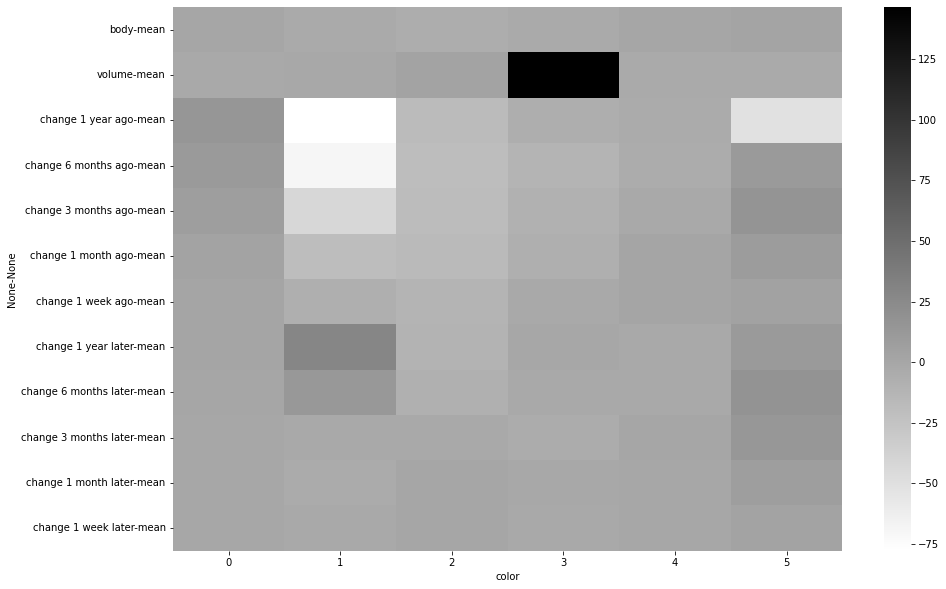

In [338]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_g_rel[cluster_labels], cmap='binary')
plt.show()

In [137]:
df[df.color==7]

Ticker  Date/Time     body   volume  change 1 year ago  \
9957     SPX 2009-06-15 -0.02007 -0.17596           -0.38685   
9958     SPX 2009-06-16 -0.01484 -0.11928           -0.39974   
9959     SPX 2009-06-17 -0.00129 -0.00834           -0.39432   
9960     SPX 2009-06-18  0.00821 -0.15657           -0.37619   
9961     SPX 2009-06-19  0.00138  0.06398           -0.37682   
...      ...        ...      ...      ...                ...   
13432    SPX 2023-03-07 -0.01541  0.02540           -0.11297   
13433    SPX 2023-03-08  0.00112 -0.06696           -0.11112   
13435    SPX 2023-03-10 -0.01317  0.38272           -0.14323   
13436    SPX 2023-03-13  0.00537  0.55840           -0.15898   
13437    SPX 2023-03-14  0.00647  0.37898           -0.14769   

       change 6 months ago  change 3 months ago  change 1 month ago  \
9957               0.05580              0.20316             0.03374   
9958               0.03599              0.15873             0.03242   
9959               0.04738              0.13670             0.00110   
9960               0.00567              0.15814             0.01121   
9961               0.01842              0.18122             0.01947   
...                    ...                  ...                 ...   
13432             -0.03064              0.00575            -0.03080   
13433              0.01497              0.01454            -0.04218   
13435             -0.01024             -0.04012            -0.05539   
13436             -0.00455             -0.03556            -0.05909   
13437              0.00496              0.00602            -0.05413   

       change 1 week ago  change 1 year later  change 6 months later  \
9957            -0.01656              0.18785                0.18740   
9958            -0.03285              0.20193                0.19464   
9959            -0.03075              0.20463                0.19715   
9960            -0.02847              0.19239                0.17690   
9961            -0.02675              0.17308                0.17960   
...                  ...                  ...                    ...   
13432            0.00408             -0.01697               -0.01697   
13433            0.01023             -0.01838               -0.01838   
13435           -0.04656              0.01483                0.01483   
13436           -0.04876              0.01634                0.01634   
13437           -0.01697              0.00000                0.00000   

       change 3 months later  change 1 month later  change 1 week later  day  \
9957                 0.13064               0.00965             -0.03378   15   
9958                 0.15865               0.03106             -0.01867   16   
9959                 0.15697               0.03206             -0.01079   17   
9960                 0.15122               0.03505              0.00206   18   
9961                 0.14470               0.03556             -0.00253   19   
...                      ...                   ...                  ...  ...   
13432               -0.01697              -0.01697             -0.01697    7   
13433               -0.01838              -0.01838             -0.01838    8   
13435                0.01483               0.01483              0.01483   10   
13436                0.01634               0.01634              0.01634   13   
13437                0.00000               0.00000              0.00000   14   

       day_of_week  month  color  
9957             0      6      7  
9958             1      6      7  
9959             2      6      7  
9960             3      6      7  
9961             4      6      7  
...            ...    ...    ...  
13432            1      3      7  
13433            2      3      7  
13435            4      3      7  
13436            0      3      7  
13437            1      3      7  

[185 rows x 18 columns]

number_of_clusters = 2


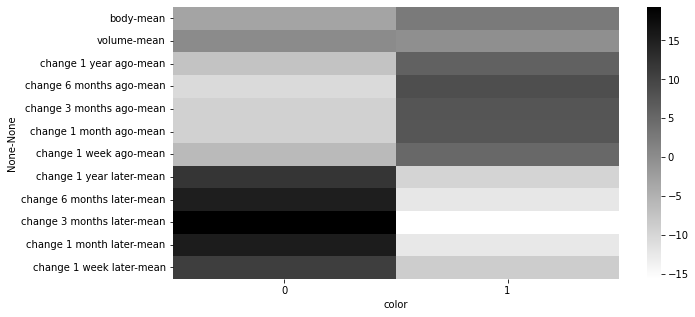

number_of_clusters = 3


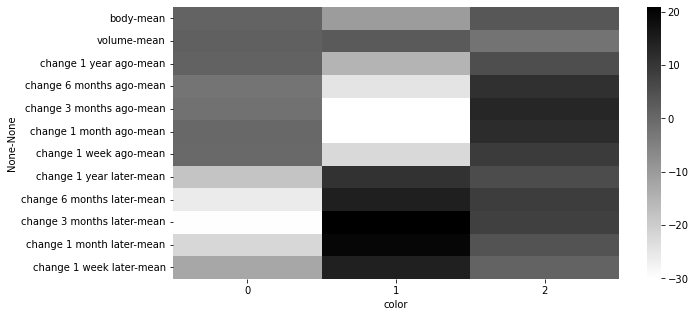

number_of_clusters = 4


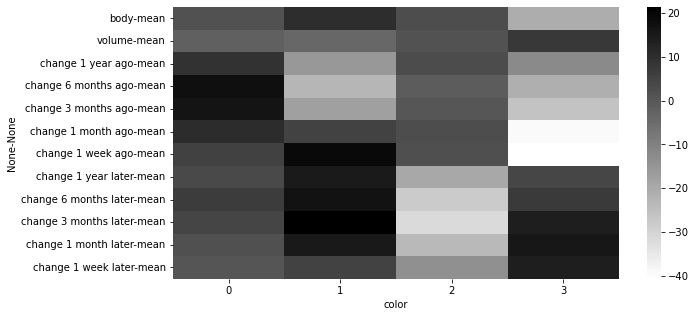

number_of_clusters = 5


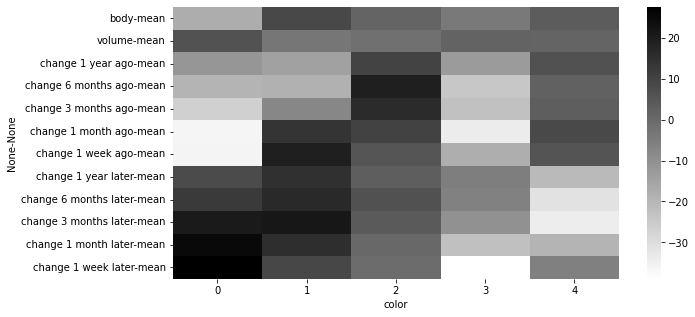

number_of_clusters = 6


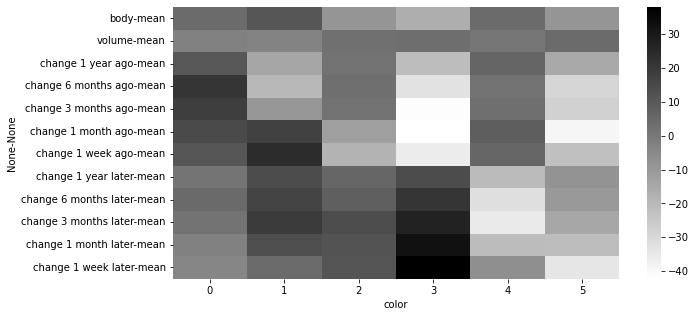

number_of_clusters = 7


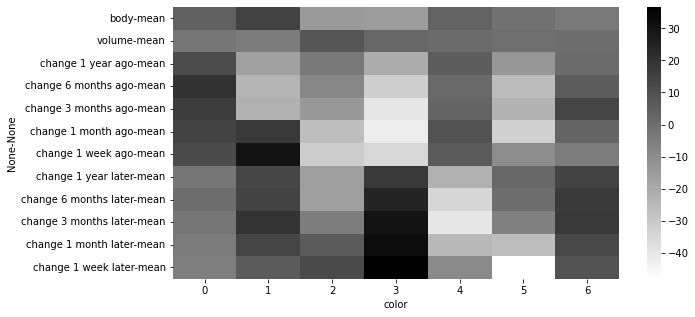

number_of_clusters = 8


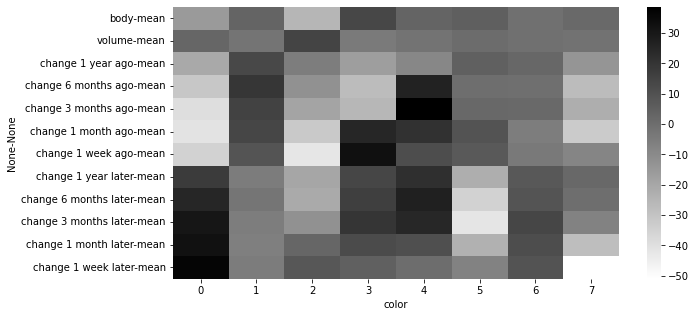

number_of_clusters = 9


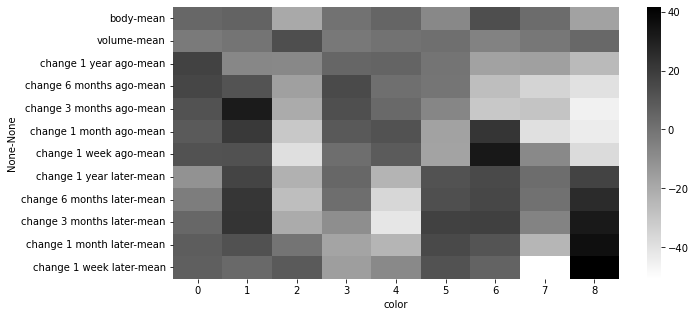

number_of_clusters = 10


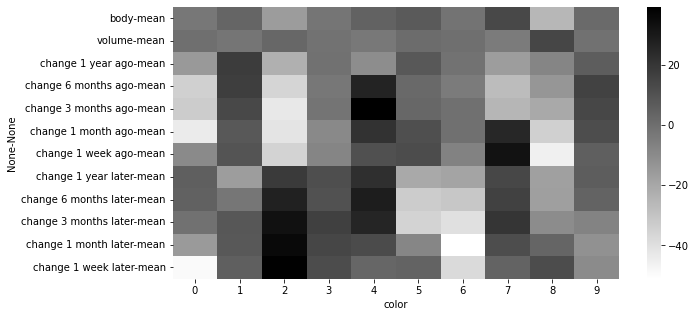

number_of_clusters = 11


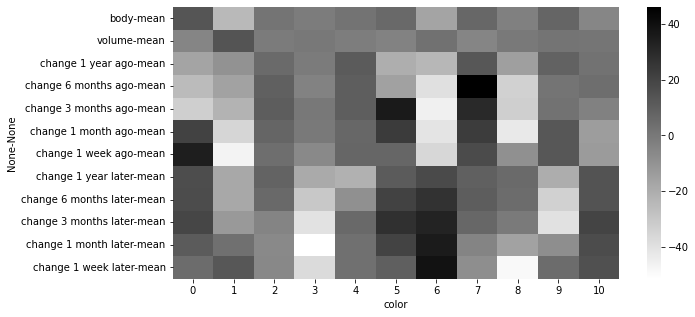

number_of_clusters = 12


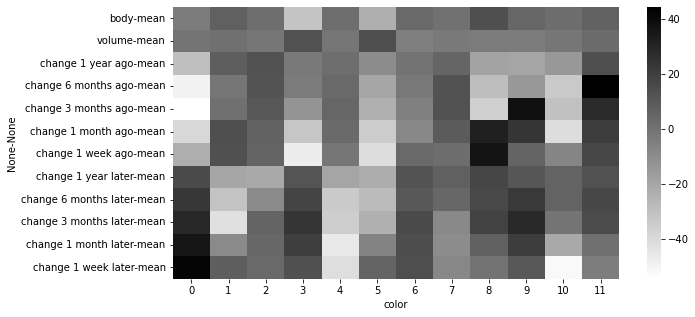

number_of_clusters = 13


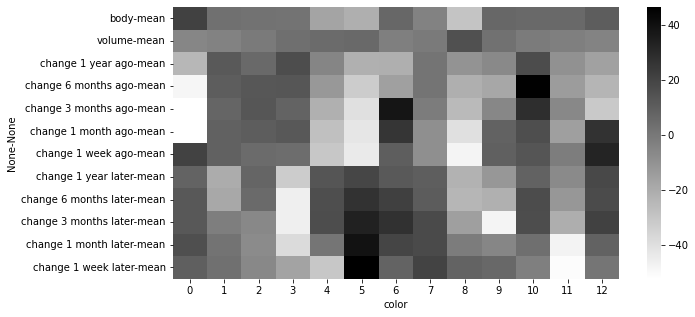

number_of_clusters = 14


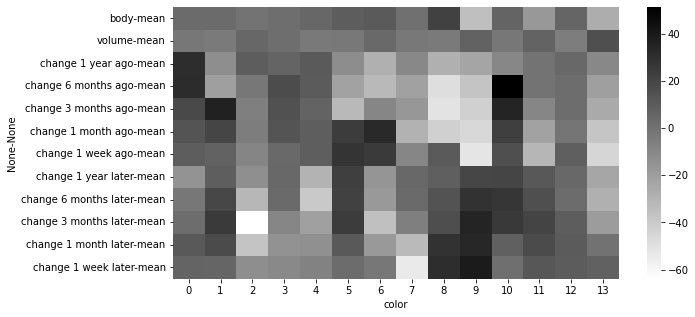

number_of_clusters = 15


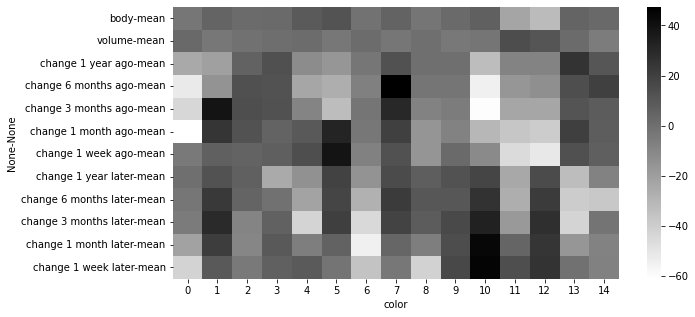

number_of_clusters = 16


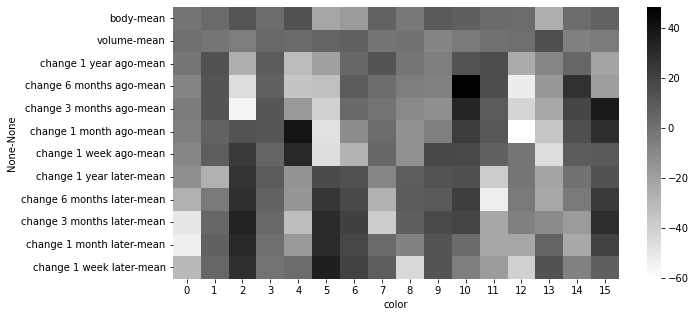

number_of_clusters = 17


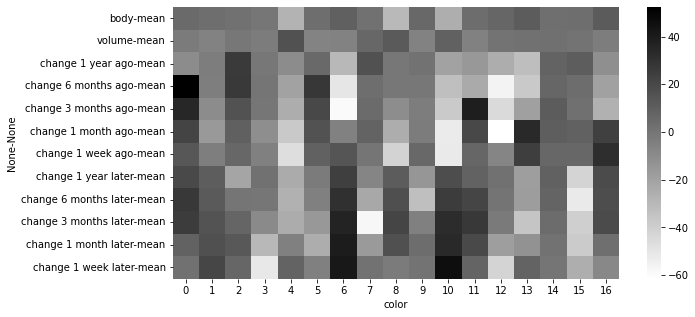

number_of_clusters = 18


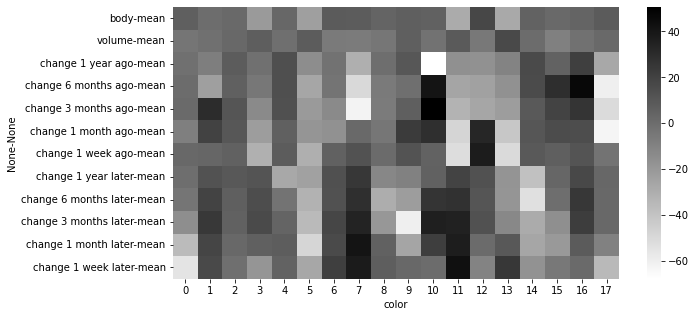

number_of_clusters = 19


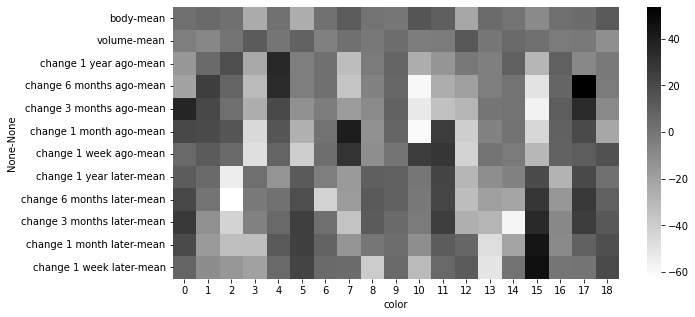

number_of_clusters = 20


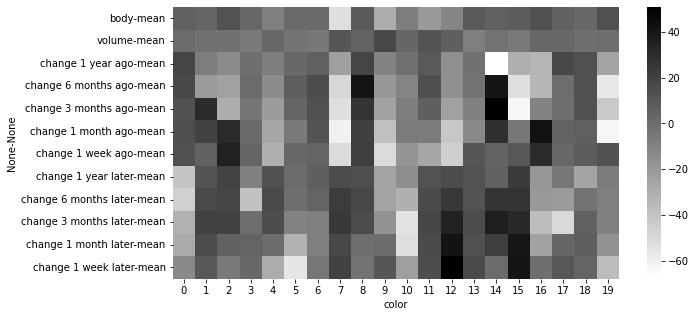

In [184]:
for j in range(2,21):
    y = df1[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later']]
    km = KMeans(n_clusters=j, random_state=42)


    km.fit(y)

    points = km.predict(y)
    labels = km.labels_
    df1['color'] = np.array(labels)
    x = df1[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later', 'color']]
    features = x.drop(columns=['color']).columns

    df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
    functions = ['mean']

    stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

    df_g_rel = df_g.copy()
    df_g_rel['Global'] = stat
    cluster_labels = np.arange(0,j)

    for i in cluster_labels:
        df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100
    print(f'number_of_clusters = {j}')
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(df_g_rel[cluster_labels], cmap='binary')
    plt.show()
    

In [254]:
nc = 9
y = df1[['body', 'volume', 'change 1 week ago', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago']]
km = KMeans(n_clusters=nc, random_state=42)


km.fit(y)

points = km.predict(y)
labels = km.labels_
df1['color'] = np.array(model.labels_)
x = df1[['body', 'volume', 'change 1 week ago', 
       , 'color']]
features = x.drop(columns=['color']).columns

df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
functions = ['mean']

stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(0,10)

for i in cluster_labels:
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100
print(f'number_of_clusters = {nc}')
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_g_rel[cluster_labels], cmap='binary')
plt.show()


SyntaxError: invalid syntax (Temp/ipykernel_18444/3946507802.py, line 13)

In [189]:
df['color'] = np.array(labels)
s = df[df.color==2]
s.to_csv(path+'ex1.csv')

number_of_clusters = 2


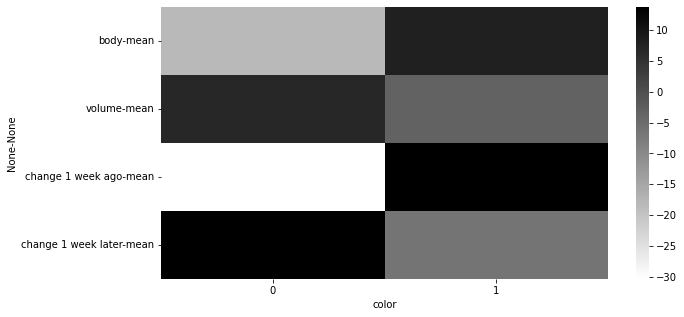

number_of_clusters = 3


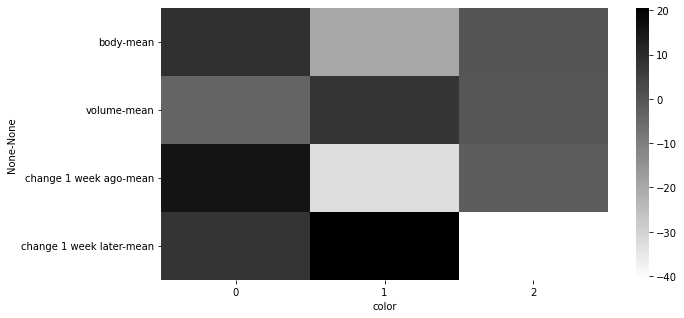

number_of_clusters = 4


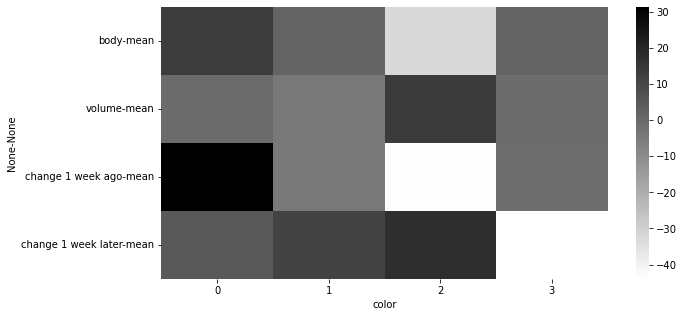

number_of_clusters = 5


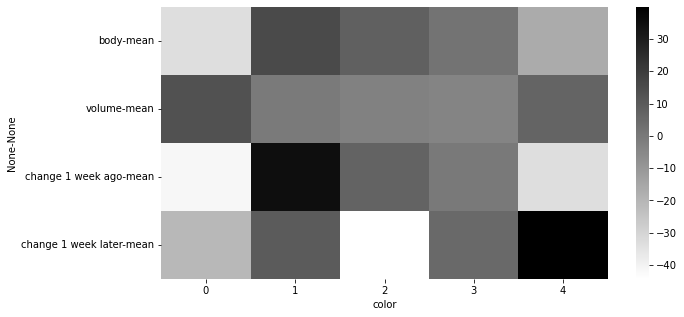

number_of_clusters = 6


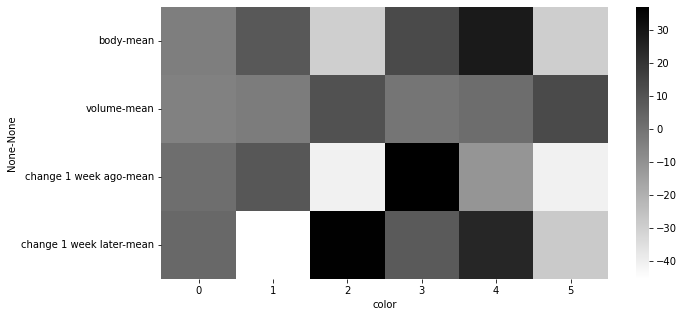

number_of_clusters = 7


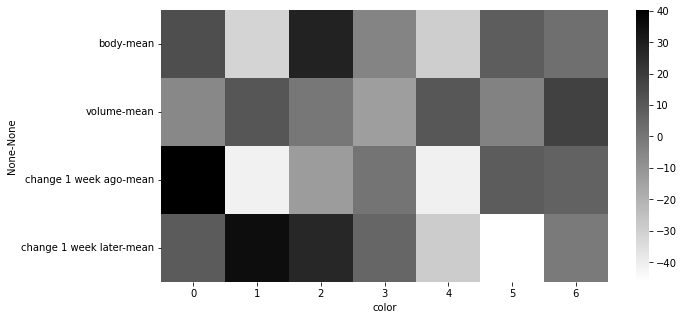

number_of_clusters = 8


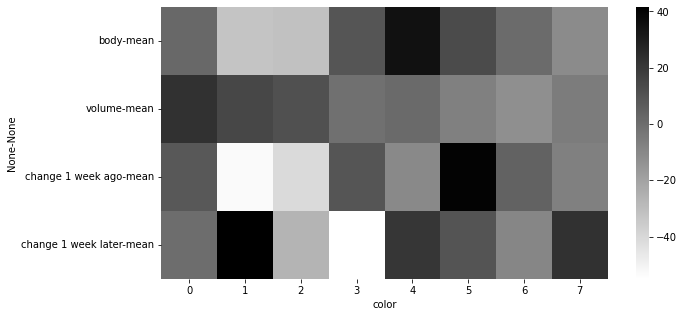

number_of_clusters = 9


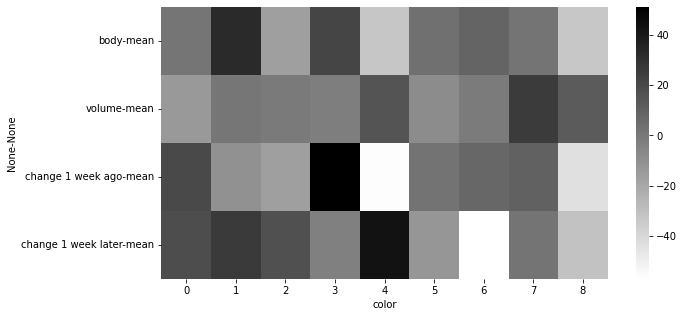

number_of_clusters = 10


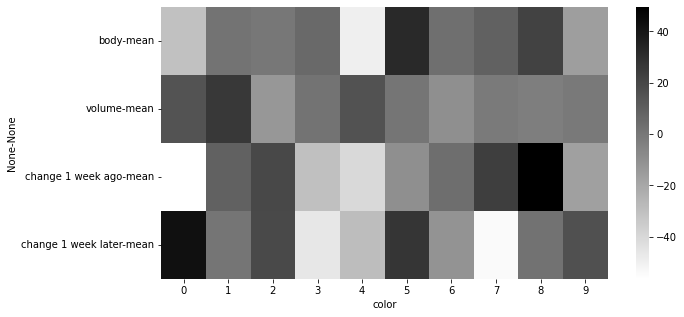

number_of_clusters = 11


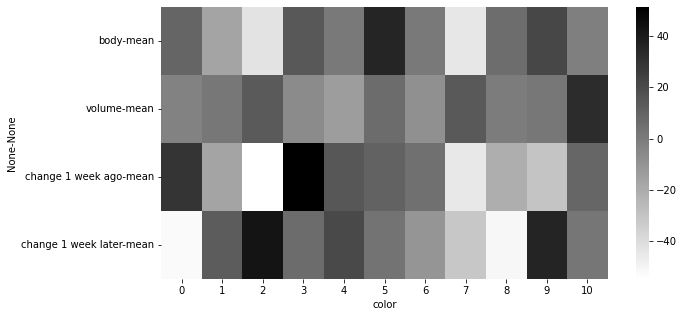

number_of_clusters = 12


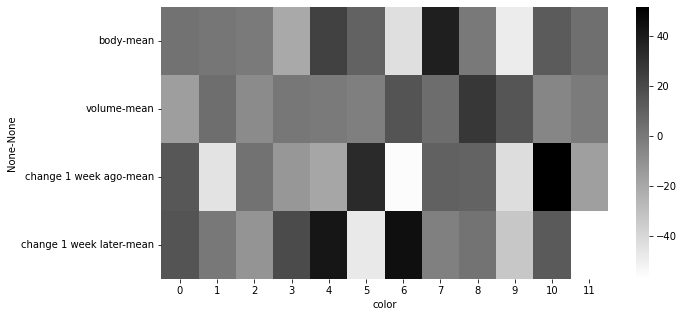

number_of_clusters = 13


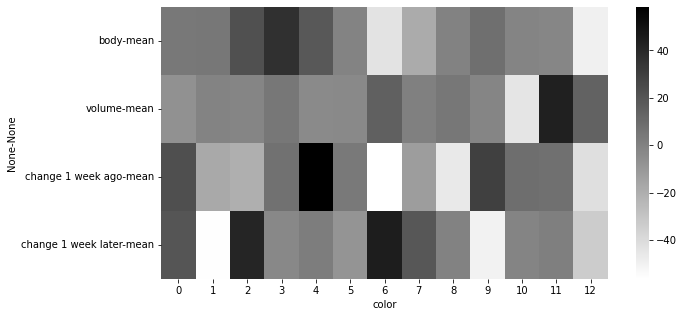

number_of_clusters = 14


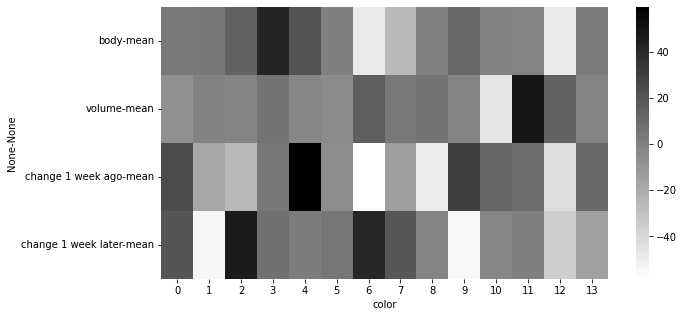

number_of_clusters = 15


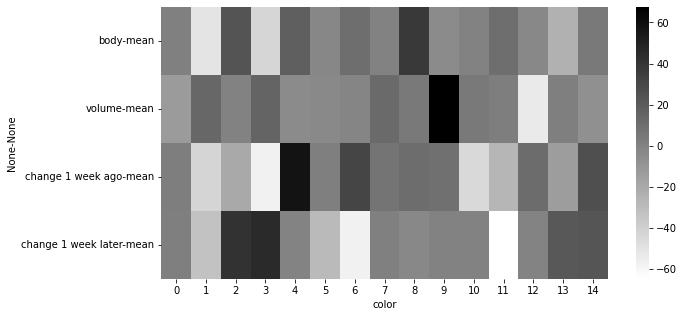

number_of_clusters = 16


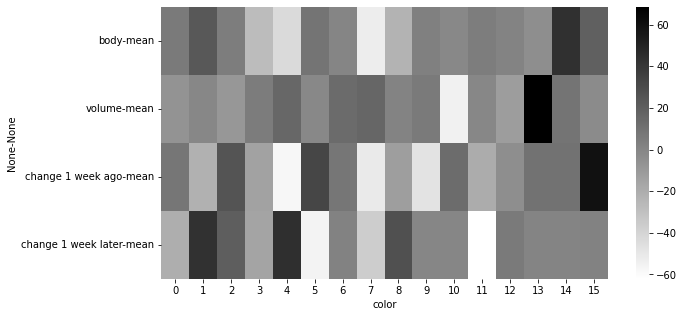

number_of_clusters = 17


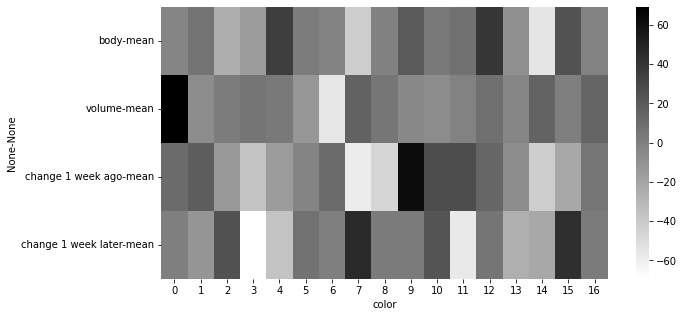

number_of_clusters = 18


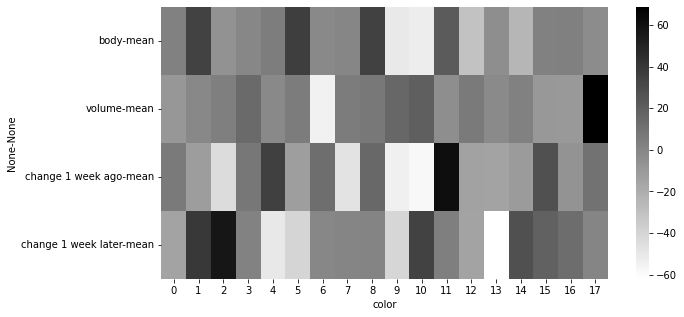

number_of_clusters = 19


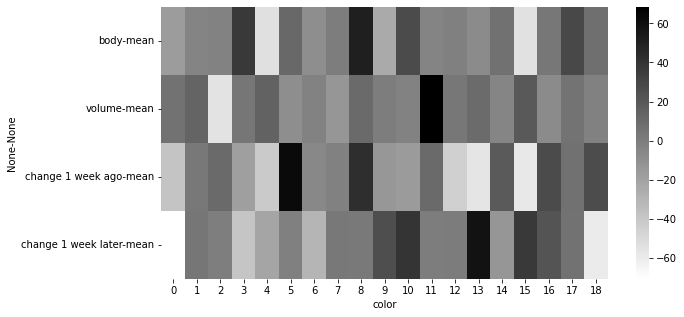

number_of_clusters = 20


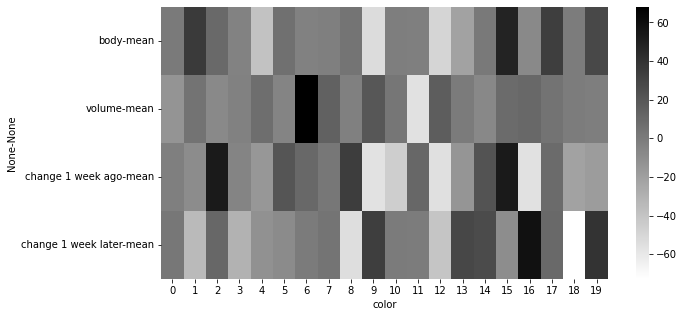

In [186]:
for j in range(2,21):
    y = df1[['body', 'volume', 'change 1 week ago', 'change 1 week later']]
    km = KMeans(n_clusters=j, random_state=42)


    km.fit(y)

    points = km.predict(y)
    labels = km.labels_
    df1['color'] = np.array(labels)
    x = df1[['body', 'volume', 'change 1 week ago',
        'change 1 week later', 'color']]
    features = x.drop(columns=['color']).columns

    df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
    functions = ['mean']

    stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

    df_g_rel = df_g.copy()
    df_g_rel['Global'] = stat
    cluster_labels = np.arange(0,j)

    for i in cluster_labels:
        df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100
    print(f'number_of_clusters = {j}')
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(df_g_rel[cluster_labels], cmap='binary')
    plt.show()

# DBSCAN

In [197]:
df1.columns

Index(['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later', 'day', 'day_of_week',
       'month'],
      dtype='object')

График при eps = 1.0


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


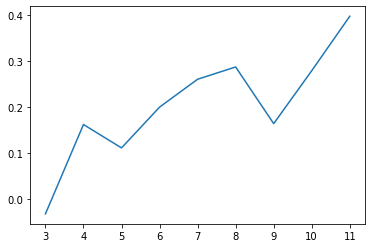

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


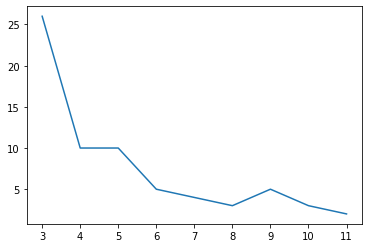

График при eps = 1.1


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


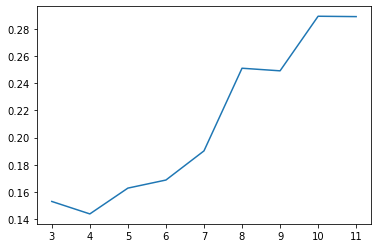

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


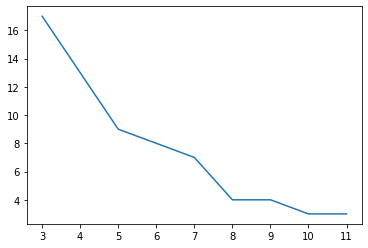

График при eps = 1.2000000000000002


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


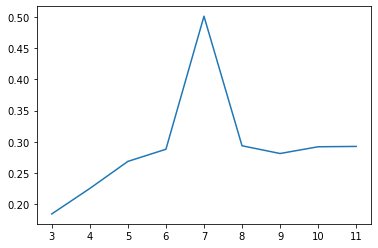

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


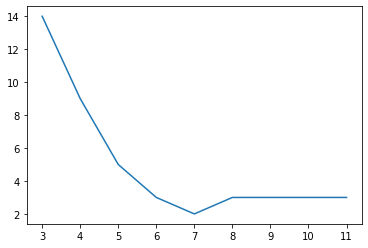

График при eps = 1.3000000000000003


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


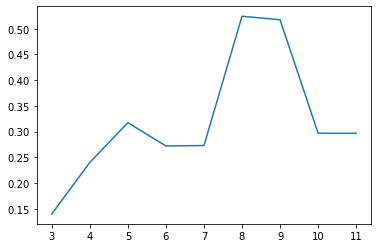

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


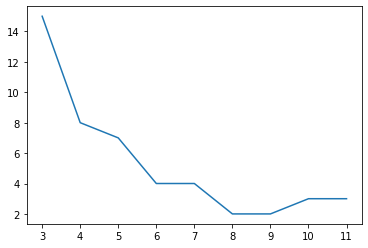

График при eps = 1.4000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


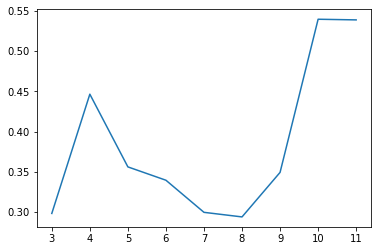

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


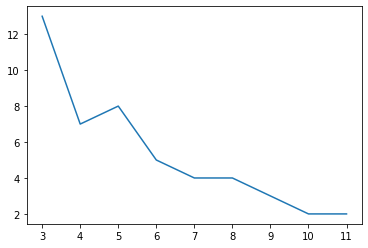

График при eps = 1.5000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


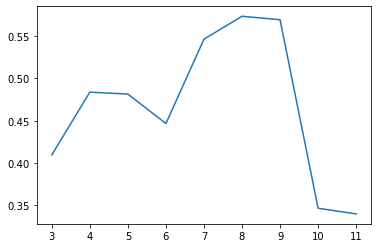

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


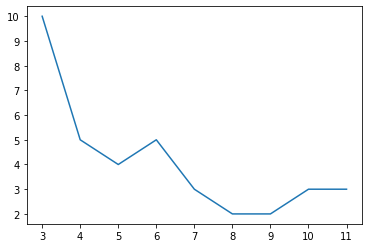

График при eps = 1.6000000000000005


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


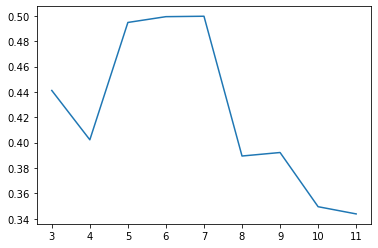

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


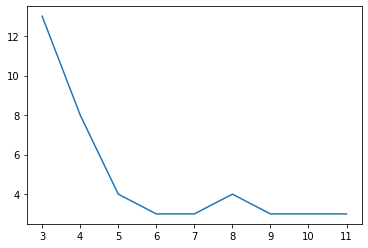

График при eps = 1.7000000000000006


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


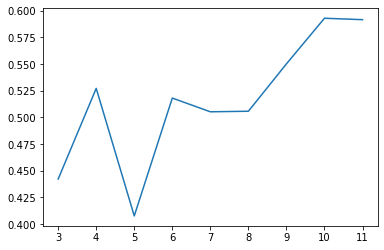

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


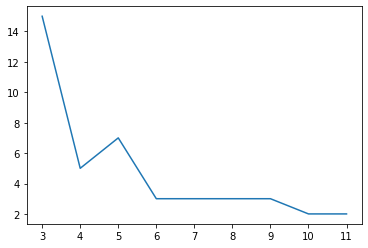

График при eps = 1.8000000000000007


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


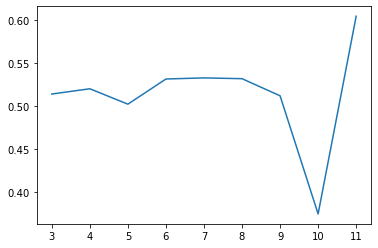

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


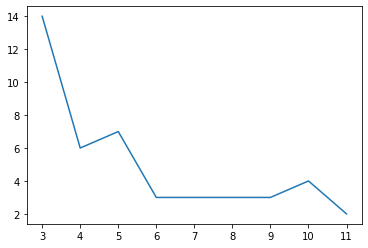

График при eps = 1.9000000000000008


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


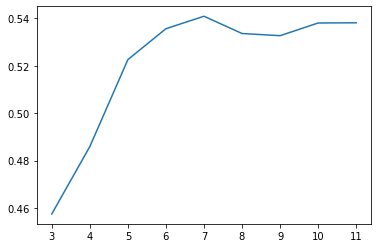

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


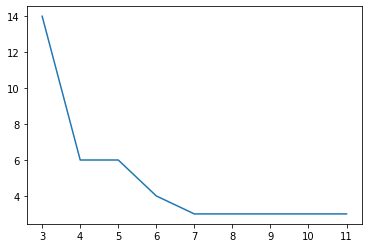

In [304]:
df_scaled = df1.drop(columns=['change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later'])

eps_ = np.arange(1,2,0.1)
min_samples_ = np.arange(3,12,1)

for i in eps_:
    metrics = []
    labels = []
    for k in min_samples_:
        model = DBSCAN(eps=i, min_samples=k).fit(df_scaled)
        score = silhouette_score(df_scaled, model.labels_)
        metrics.append(score)
        labels.append(len(np.unique(model.labels_))) 
    print(f'График при eps = {i}')
    
    sns.lineplot(min_samples_, metrics);
    plt.show()
    sns.lineplot(min_samples_, labels);
   
    plt.show()


In [348]:
model = DBSCAN(eps=1.9, min_samples=4)
model.fit(df_scaled)

DBSCAN(eps=1.9, min_samples=4)

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


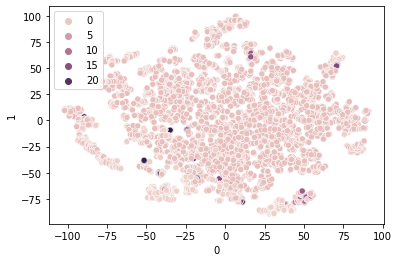

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


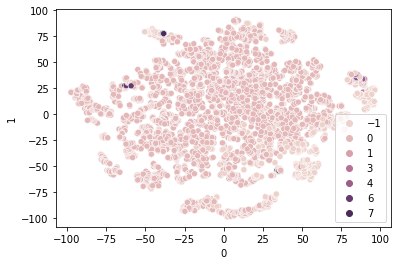

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


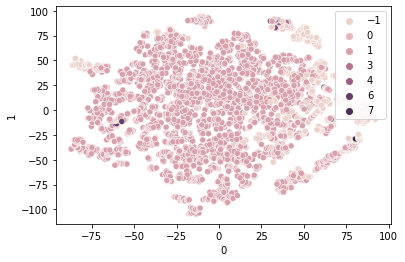

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


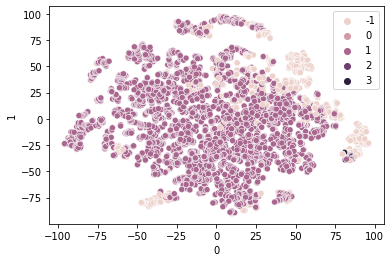

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


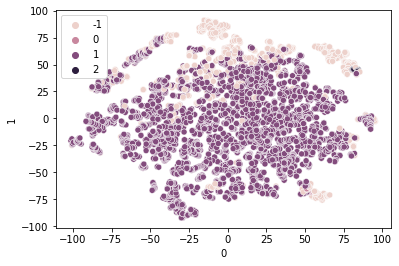

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


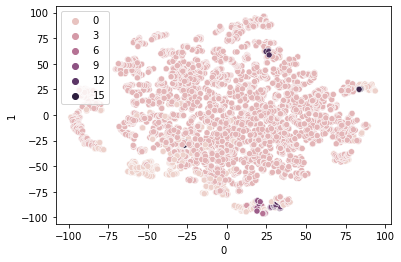

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


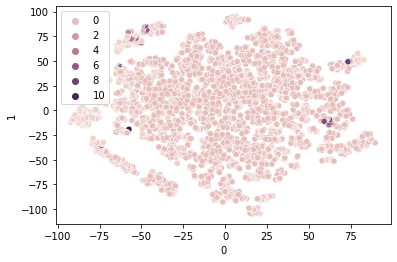

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


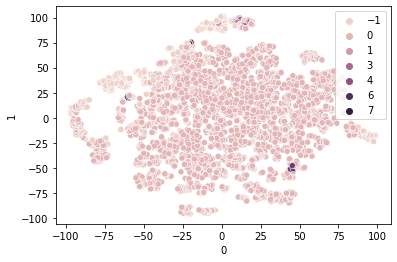

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


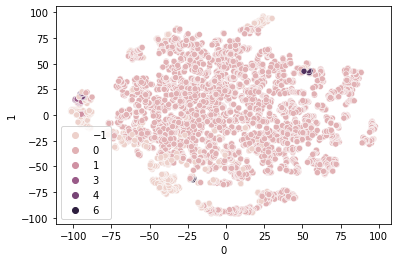

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


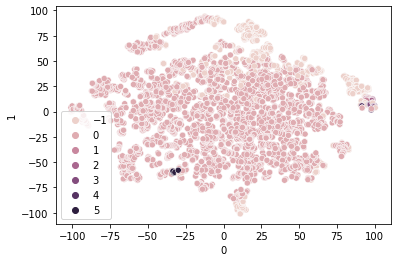

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


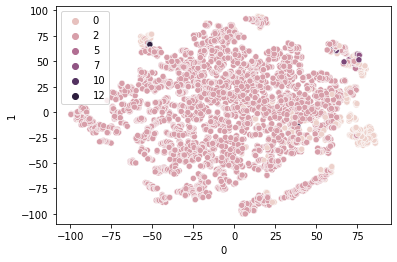

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


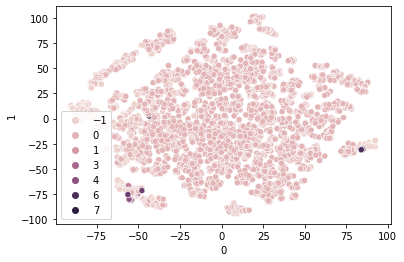

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


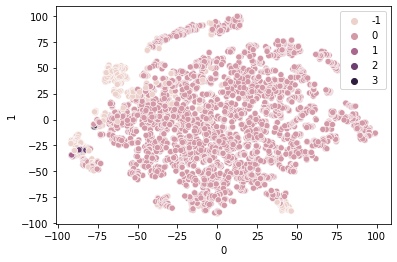

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


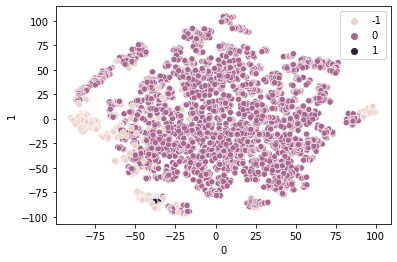

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


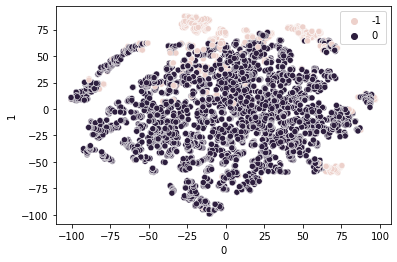

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


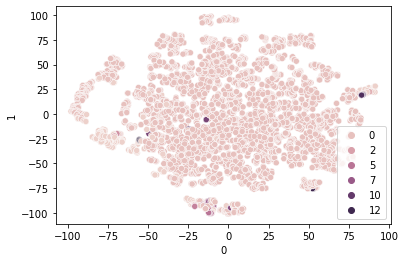

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


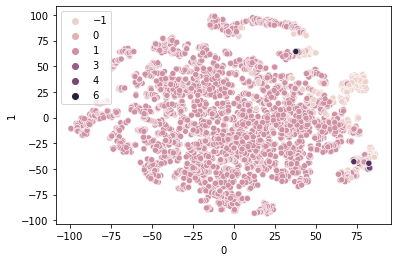

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


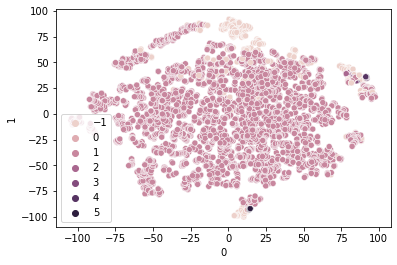

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


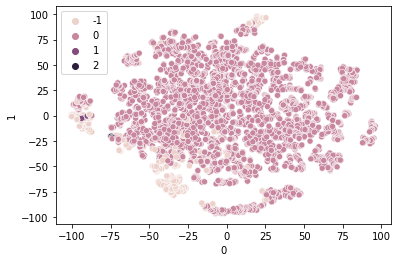

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


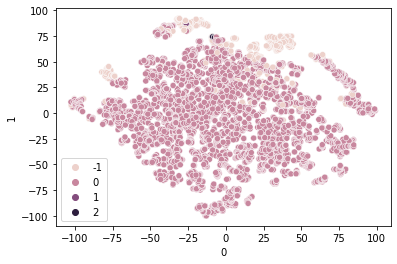

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


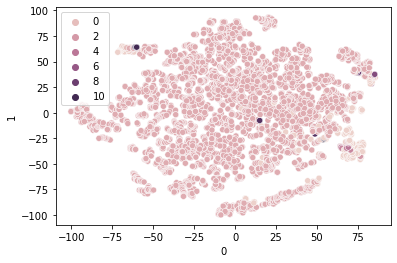

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


perplexity = 1.9000000000000008


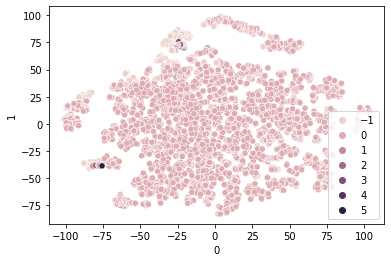

KeyboardInterrupt: 

In [308]:
for eps_ in np.arange(1, 2, 0.1):
    for ms in np.arange(3, 8, 1):
        model = DBSCAN(eps=eps_, min_samples=ms)
        model.fit(df_scaled)
        tsne = TSNE(n_components=2, perplexity=16)
        df_emb = tsne.fit_transform(df1)
        data = pd.DataFrame(df_emb)
        sns.scatterplot(data[0], data[1], hue=model.labels_)
        print ('perplexity = ' + str(i))
        plt.show()

In [271]:
df1

body    volume  change 1 year ago  change 6 months ago  \
9135  -0.663854  4.183603          -0.486622            -0.407573   
9136   0.826586  3.621552          -0.439910            -0.262488   
9137   0.184304  3.025522          -0.354884            -0.339251   
9138   1.213682  2.817749          -0.313421            -0.193111   
9139   0.464147  2.687101          -0.210113            -0.036946   
...         ...       ...                ...                  ...   
13433  0.077051 -0.321550          -1.919031            -0.587347   
13434 -2.563580  0.967285          -2.180320            -0.877650   
13435 -1.684602  2.047399          -2.199914            -0.919857   
13436  0.600986  2.972894          -2.337688            -0.844808   
13437  0.736593  2.027696          -2.238928            -0.719375   

       change 3 months ago  change 1 month ago  change 1 week ago  \
9135             -0.438683            0.065837          -0.876707   
9136             -0.219310            0.025231          -0.406752   
9137             -0.159530            0.127172           0.085942   
9138             -0.024352            0.348945           0.747019   
9139              0.037044            0.562767           0.867757   
...                    ...                 ...                ...   
13433            -0.298478           -1.524055           0.391846   
13434            -0.887482           -1.736741          -1.026140   
13435            -1.279732           -1.899166          -2.682894   
13436            -1.197871           -2.004231          -2.802007   
13437            -0.451429           -1.863387          -1.080824   

       change 1 year later  change 6 months later  change 3 months later  \
9135              0.180051              -0.370075              -0.700335   
9136             -0.066294              -0.413981              -0.914561   
9137             -0.025931              -0.434907              -1.172034   
9138             -0.085011              -0.435421              -1.566216   
9139             -0.156866              -0.440684              -1.549540   
...                    ...                    ...                    ...   
13433            -0.873635              -0.824029              -0.830080   
13434            -0.708370              -0.584856              -0.488675   
13435            -0.579032              -0.397677              -0.221489   
13436            -0.565637              -0.378291              -0.193818   
13437            -0.710587              -0.588065              -0.493257   

       change 1 month later  change 1 week later       day  day_of_week  \
9135               0.215401             1.239809 -0.761699     0.704687   
9136               0.032683             0.929719 -0.647617     1.421105   
9137              -0.252346             0.724800 -0.305369    -1.444568   
9138              -0.515761            -0.162642 -0.191286    -0.728150   
9139              -0.616054            -0.068314 -0.077204    -0.011731   
...                     ...                  ...       ...          ...   
13433             -0.836815            -1.148748 -0.875782    -0.011731   
13434             -0.299899            -0.138789 -0.761699     0.704687   
13435              0.120296             0.651614 -0.647617     1.421105   
13436              0.163814             0.733474 -0.305369    -1.444568   
13437             -0.307104            -0.152342 -0.191286    -0.728150   

         month  color  
9135  -1.04844      0  
9136  -1.04844      0  
9137  -1.04844      0  
9138  -1.04844      0  
9139  -1.04844      0  
...        ...    ...  
13433 -1.04844      0  
13434 -1.04844      0  
13435 -1.04844      0  
13436 -1.04844     -1  
13437 -1.04844     -1  

[3542 rows x 16 columns]

body    volume  change 1 year ago  change 6 months ago  \
9135  -0.663854  4.183603          -0.486622            -0.407573   
9136   0.826586  3.621552          -0.439910            -0.262488   
9137   0.184304  3.025522          -0.354884            -0.339251   
9138   1.213682  2.817749          -0.313421            -0.193111   
9139   0.464147  2.687101          -0.210113            -0.036946   
...         ...       ...                ...                  ...   
13433  0.077051 -0.321550          -1.919031            -0.587347   
13434 -2.563580  0.967285          -2.180320            -0.877650   
13435 -1.684602  2.047399          -2.199914            -0.919857   
13436  0.600986  2.972894          -2.337688            -0.844808   
13437  0.736593  2.027696          -2.238928            -0.719375   

       change 3 months ago  change 1 month ago  change 1 week ago  \
9135             -0.438683            0.065837          -0.876707   
9136             -0.219310            0.025231          -0.406752   
9137             -0.159530            0.127172           0.085942   
9138             -0.024352            0.348945           0.747019   
9139              0.037044            0.562767           0.867757   
...                    ...                 ...                ...   
13433            -0.298478           -1.524055           0.391846   
13434            -0.887482           -1.736741          -1.026140   
13435            -1.279732           -1.899166          -2.682894   
13436            -1.197871           -2.004231          -2.802007   
13437            -0.451429           -1.863387          -1.080824   

       change 1 year later  change 6 months later  change 3 months later  \
9135              0.180051              -0.370075              -0.700335   
9136             -0.066294              -0.413981              -0.914561   
9137             -0.025931              -0.434907              -1.172034   
9138             -0.085011              -0.435421              -1.566216   
9139             -0.156866              -0.440684              -1.549540   
...                    ...                    ...                    ...   
13433            -0.873635              -0.824029              -0.830080   
13434            -0.708370              -0.584856              -0.488675   
13435            -0.579032              -0.397677              -0.221489   
13436            -0.565637              -0.378291              -0.193818   
13437            -0.710587              -0.588065              -0.493257   

       change 1 month later  change 1 week later       day  day_of_week  \
9135               0.215401             1.239809 -0.761699     0.704687   
9136               0.032683             0.929719 -0.647617     1.421105   
9137              -0.252346             0.724800 -0.305369    -1.444568   
9138              -0.515761            -0.162642 -0.191286    -0.728150   
9139              -0.616054            -0.068314 -0.077204    -0.011731   
...                     ...                  ...       ...          ...   
13433             -0.836815            -1.148748 -0.875782    -0.011731   
13434             -0.299899            -0.138789 -0.761699     0.704687   
13435              0.120296             0.651614 -0.647617     1.421105   
13436              0.163814             0.733474 -0.305369    -1.444568   
13437             -0.307104            -0.152342 -0.191286    -0.728150   

         month  color  
9135  -1.04844      3  
9136  -1.04844      3  
9137  -1.04844      3  
9138  -1.04844      3  
9139  -1.04844      3  
...        ...    ...  
13433 -1.04844      5  
13434 -1.04844      4  
13435 -1.04844      4  
13436 -1.04844      3  
13437 -1.04844      3  

[3542 rows x 16 columns]

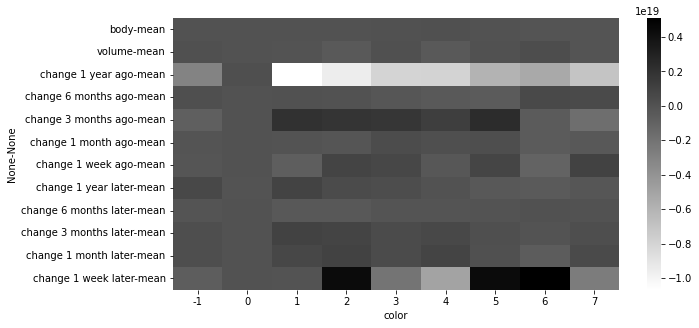

In [263]:
labels = model.labels_
df1['color'] = np.array(model.labels_)
x = df1[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later','color']]
features = x.drop(columns=['color']).columns

df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
functions = ['mean']

stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(0,10)

for i in np.arange(-1,8):
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_g_rel[np.arange(-1,8)], cmap='binary')
plt.show()


df_g_rel

In [266]:
df['color'] = np.array(model.labels_)
df[df.color==6]

Ticker  Date/Time     body   volume  change 1 year ago  \
13308    SPX 2022-09-14  0.00134  0.21321           -0.11865   
13309    SPX 2022-09-15 -0.00793  0.20863           -0.10946   
13312    SPX 2022-09-20 -0.00499  0.06793           -0.12218   
13313    SPX 2022-09-21 -0.02127  0.11545           -0.12637   
13314    SPX 2022-09-22 -0.00646  0.08553           -0.14531   
13319    SPX 2022-09-29 -0.01270  0.08833           -0.17821   

       change 6 months ago  change 3 months ago  change 1 month ago  \
13308             -0.13395              0.07120            -0.08712   
13309             -0.13298              0.05981            -0.09124   
13312             -0.17111              0.01574            -0.07060   
13313             -0.20055             -0.03163            -0.08562   
13314             -0.20270             -0.03712            -0.09700   
13319             -0.20777             -0.04953            -0.08287   

       change 1 week ago  change 1 year later  change 6 months later  \
13308           -0.00854             -0.00679               -0.00704   
13309           -0.02652              0.00459               -0.01024   
13312           -0.01971              0.01630                0.01630   
13313           -0.04036              0.03356                0.03356   
13314           -0.03744              0.04203                0.04203   
13319           -0.03177              0.07380                0.07380   

       change 3 months later  change 1 month later  change 1 week later  day  \
13308                0.01123              -0.07254             -0.04036   14   
13309                0.02987              -0.08510             -0.03744   15   
13312               -0.00093              -0.04259             -0.05563   20   
13313                0.00729              -0.03331             -0.01888   21   
13314                0.01679              -0.00140             -0.03177   22   
13319                0.05056               0.06914              0.02818   29   

       day_of_week  month  color  
13308            2      9      6  
13309            3      9      6  
13312            1      9      6  
13313            2      9      6  
13314            3      9      6  
13319            3      9      6

# Selecting the algorithm

In [251]:
path = 'D:\\Michael\\Data\\VolumePriceML\\'
file = 'Bitcoin - Volume_Price.csv'
df = pd.read_csv(path + file, parse_dates = ['Date/Time'], dayfirst = False)
df

Date/Time        Open        High         Low       Close        Volume  \
0    2012-05-13    4.950000    4.950000    4.940000    4.940000    395.462952   
1    2012-05-28    5.080000    5.080000    5.070000    5.070000    180.683838   
2    2016-04-10  418.589996  418.720001  417.980011  418.359985     37.137348   
3    2011-09-29    4.810000    4.820000    4.810000    4.820000     46.964500   
4    2012-05-17    5.020000    5.030000    5.010000    5.020000    611.212830   
...         ...         ...         ...         ...         ...           ...   
3532 2012-01-31    5.700000    6.220000    3.800000    5.300000    110.503334   
3533 2011-08-24   11.500000   11.500000   10.500000   10.500000      2.356522   
3534 2013-04-11  162.000000  179.000000   50.000000   83.400002  37205.886720   
3535 2013-04-10  228.940002  259.339996   70.000000  162.000000  20889.470700   
3536 2011-11-25    2.500000   15.000000    2.500000    2.750000    179.787262   

            HL 2      LN(V)  
0       0.010000   5.980057  
1       0.010000   5.196749  
2       0.739990   3.614623  
3       0.010000   3.849392  
4       0.020000   6.415445  
...          ...        ...  
3532    2.420000   4.705046  
3533    1.000000   0.857187  
3534  129.000000  10.524222  
3535  189.339996   9.947001  
3536   12.500000   5.191774  

[3537 rows x 8 columns]

In [186]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
df

Date/Time        Open        High         Low       Close        Volume  \
0    2012-05-13    4.950000    4.950000    4.940000    4.940000    395.462952   
1    2012-05-28    5.080000    5.080000    5.070000    5.070000    180.683838   
2    2016-04-10  418.589996  418.720001  417.980011  418.359985     37.137348   
3    2011-09-29    4.810000    4.820000    4.810000    4.820000     46.964500   
4    2012-05-17    5.020000    5.030000    5.010000    5.020000    611.212830   
...         ...         ...         ...         ...         ...           ...   
3532 2012-01-31    5.700000    6.220000    3.800000    5.300000    110.503334   
3533 2011-08-24   11.500000   11.500000   10.500000   10.500000      2.356522   
3534 2013-04-11  162.000000  179.000000   50.000000   83.400002  37205.886720   
3535 2013-04-10  228.940002  259.339996   70.000000  162.000000  20889.470700   
3536 2011-11-25    2.500000   15.000000    2.500000    2.750000    179.787262   

            HL 2      LN(V)  
0       0.010000   5.980057  
1       0.010000   5.196749  
2       0.739990   3.614623  
3       0.010000   3.849392  
4       0.020000   6.415445  
...          ...        ...  
3532    2.420000   4.705046  
3533    1.000000   0.857187  
3534  129.000000  10.524222  
3535  189.339996   9.947001  
3536   12.500000   5.191774  

[3537 rows x 8 columns]

In [252]:
df.drop(columns=['Open', 'Close', 'HL 2', 'LN(V)'], inplace=True)
df

Date/Time        High         Low        Volume
0    2012-05-13    4.950000    4.940000    395.462952
1    2012-05-28    5.080000    5.070000    180.683838
2    2016-04-10  418.720001  417.980011     37.137348
3    2011-09-29    4.820000    4.810000     46.964500
4    2012-05-17    5.030000    5.010000    611.212830
...         ...         ...         ...           ...
3532 2012-01-31    6.220000    3.800000    110.503334
3533 2011-08-24   11.500000   10.500000      2.356522
3534 2013-04-11  179.000000   50.000000  37205.886720
3535 2013-04-10  259.339996   70.000000  20889.470700
3536 2011-11-25   15.000000    2.500000    179.787262

[3537 rows x 4 columns]

In [253]:
df['HL'] = df.High/df.Low
df.drop(columns=['High', 'Low'], inplace=True)
df

Date/Time        Volume        HL
0    2012-05-13    395.462952  1.002024
1    2012-05-28    180.683838  1.001972
2    2016-04-10     37.137348  1.001770
3    2011-09-29     46.964500  1.002079
4    2012-05-17    611.212830  1.003992
...         ...           ...       ...
3532 2012-01-31    110.503334  1.636842
3533 2011-08-24      2.356522  1.095238
3534 2013-04-11  37205.886720  3.580000
3535 2013-04-10  20889.470700  3.704857
3536 2011-11-25    179.787262  6.000000

[3537 rows x 3 columns]

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


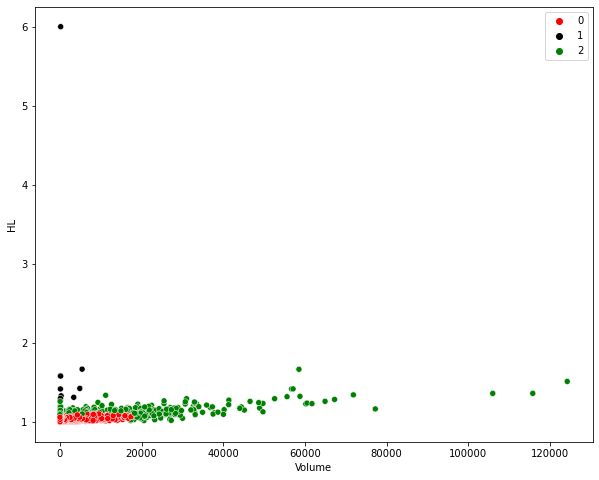

In [53]:

path = 'D:\\Michael\\Data\\VolumePriceML\\'
file = 'BTCUSD_edit.csv'
df = pd.read_csv(path + file, parse_dates = ['Date/Time'], dayfirst = False)
df = df.sort_values(by=['Date/Time'], ascending=False)
df1_A = df.drop(columns=['Date/Time'])
df1 = df1_A.copy()
# std_scaler = StandardScaler()
# std_scaler.fit(df1)
# std_scaled = std_scaler.transform(df1)

# df1[df1.columns] = std_scaled

model = BayesianGaussianMixture(n_components=3)



model.fit(df1)
points = model.predict(df1)
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

In [ ]:
df['color'] = points
df.to_csv(path + "indicatorDBCSANF.csv")

In [34]:
np.unique(points)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [196]:
df1_A = df.drop(columns=['Date/Time'])
df1_A

Volume        HL
3529     1.926578  1.062780
3533     2.356522  1.095238
3528   164.479996  1.582857
3427    79.760002  1.110000
3501     6.860000  1.078378
...           ...       ...
2948  4725.827148  1.092053
3240  5099.263672  1.135787
2941  3300.160156  1.087481
2926  3260.565430  1.086117
2003  1427.682129  1.042458

[3537 rows x 2 columns]

In [131]:
df1_L1 = df.drop(columns=['Date/Time'])
df1_L1['HL'] = np.log(df1_L1['HL'])
df1_L1

Volume        HL
0       395.462952  0.002022
1       180.683838  0.001970
2        37.137348  0.001769
3        46.964500  0.002077
4       611.212830  0.003984
...            ...       ...
3532    110.503334  0.492769
3533      2.356522  0.090972
3534  37205.886720  1.275363
3535  20889.470700  1.309645
3536    179.787262  1.791759

[3537 rows x 2 columns]

In [133]:
df1_L2 = df.drop(columns=['Date/Time'])
df1_L2['HL'] = np.log(df1_L2['HL'])
df1_L2['Volume'] = np.log(df1_L2['Volume'])
df1_L2

Volume        HL
0      5.980057  0.002022
1      5.196749  0.001970
2      3.614623  0.001769
3      3.849392  0.002077
4      6.415445  0.003984
...         ...       ...
3532   4.705046  0.492769
3533   0.857187  0.090972
3534  10.524222  1.275363
3535   9.947001  1.309645
3536   5.191774  1.791759

[3537 rows x 2 columns]

In [197]:
df1 = df1_A.copy()
df1

Volume        HL
3529     1.926578  1.062780
3533     2.356522  1.095238
3528   164.479996  1.582857
3427    79.760002  1.110000
3501     6.860000  1.078378
...           ...       ...
2948  4725.827148  1.092053
3240  5099.263672  1.135787
2941  3300.160156  1.087481
2926  3260.565430  1.086117
2003  1427.682129  1.042458

[3537 rows x 2 columns]

In [235]:
df1 = df[['volume', 'body']]
df1

volume  body
0        1.93  1.06
1        2.36  1.10
2      164.48  1.58
3       79.76  1.11
4        6.86  1.08
...       ...   ...
3532  4725.83  1.09
3533  5099.26  1.14
3534  3300.16  1.09
3535  3260.57  1.09
3536  1427.68  1.04

[3537 rows x 2 columns]

## Standard

In [159]:
std_scaler = StandardScaler()
std_scaler.fit(df1)
std_scaled = std_scaler.transform(df1)

df1[df1.columns] = std_scaled
df1

Volume         HL
0    -1.989993  -0.831102
1    -2.577072  -0.831820
2    -3.762853  -0.834613
3    -3.586897  -0.830344
4    -1.663676  -0.803914
...        ...        ...
3532 -2.945597   5.969819
3533 -5.829513   0.401589
3534  1.415795  16.815253
3535  0.983176  17.290342
3536 -2.580800  23.971641

[3537 rows x 2 columns]

## MinMax

In [128]:
std_scaler = MinMaxScaler()
std_scaler.fit(df1)
std_scaled = std_scaler.transform(df1)

df1[df1.columns] = std_scaled
df1

Volume        HL
0     0.002872  0.000051
1     0.001305  0.000040
2     0.000257  0.000000
3     0.000329  0.000062
4     0.004446  0.000444
...        ...       ...
3532  0.000793  0.127059
3533  0.000003  0.018700
3534  0.271439  0.515829
3535  0.152395  0.540809
3536  0.001298  1.000000

[3537 rows x 2 columns]

# AffinityPropagation

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


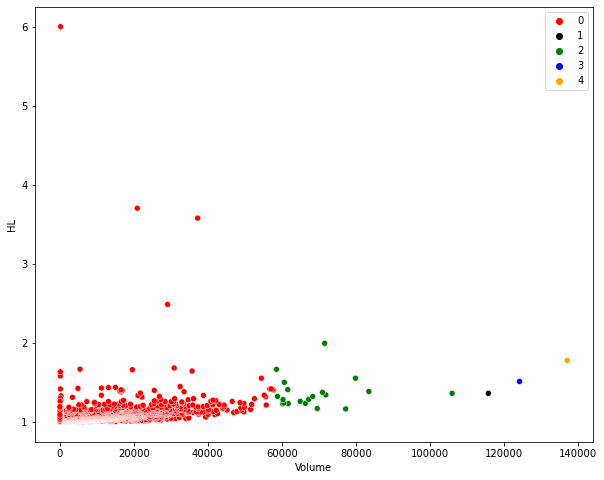

In [491]:
# ‘euclidean’, ‘precomputed’
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.92, max_iter=200, affinity='euclidean', random_state=42)
model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green', 'blue', 'orange'])
plt.show()

# AgglomerativeClustering

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


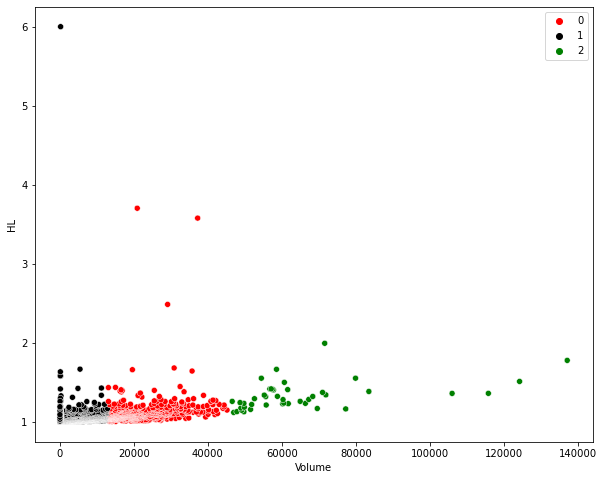

In [496]:

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# BayesianGaussianMixture

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


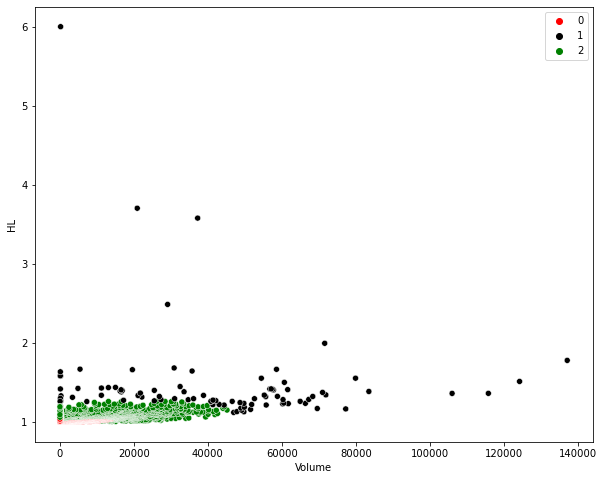

In [193]:

from sklearn.mixture import BayesianGaussianMixture

model = BayesianGaussianMixture(n_components=3)
model.fit(df1)
points = model.predict(df1)
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# GaussianMixture

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


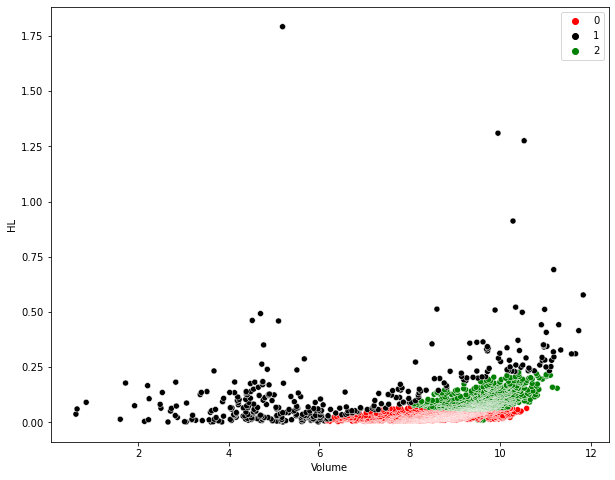

In [152]:

from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3)
model.fit(df1)
points = model.predict(df1)
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# Birch

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


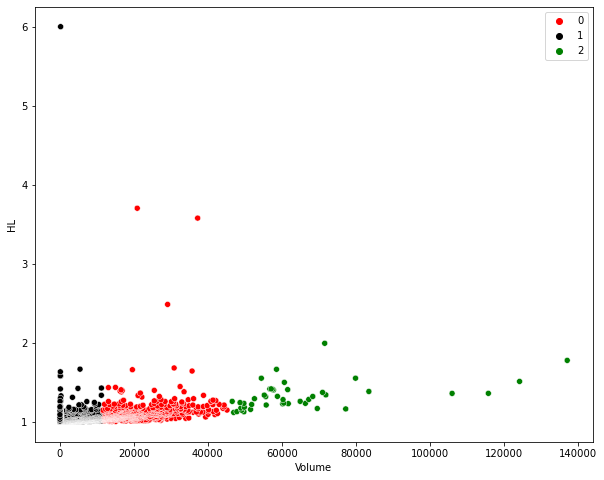

In [515]:

from sklearn.cluster import Birch

model = Birch(n_clusters=3)
model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# DBSCAN

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


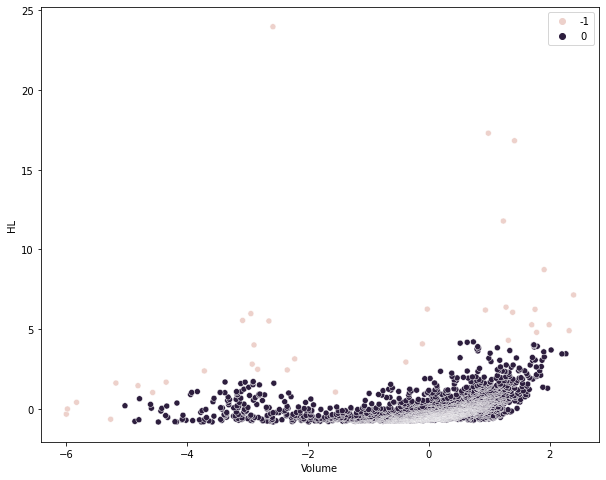

In [154]:

from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=7)
model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# KMeans

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


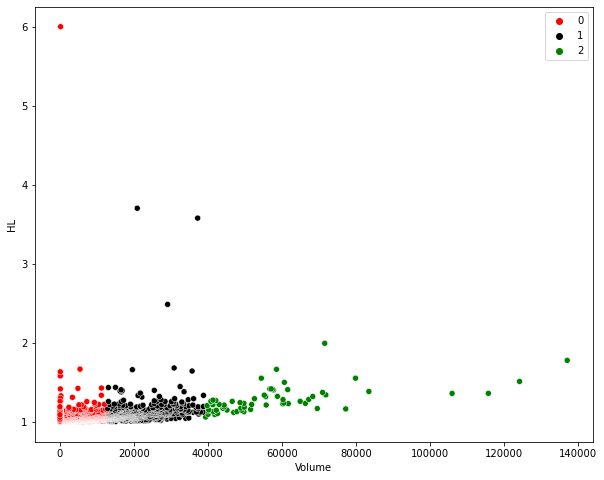

In [543]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)


model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# MiniBatchKMeans

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


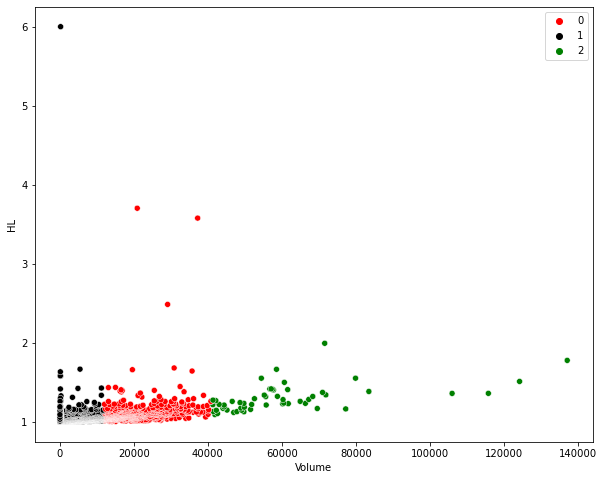

In [16]:
from sklearn.cluster import MiniBatchKMeans

model = MiniBatchKMeans(n_clusters=3, random_state=42)


model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# MeanShift

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


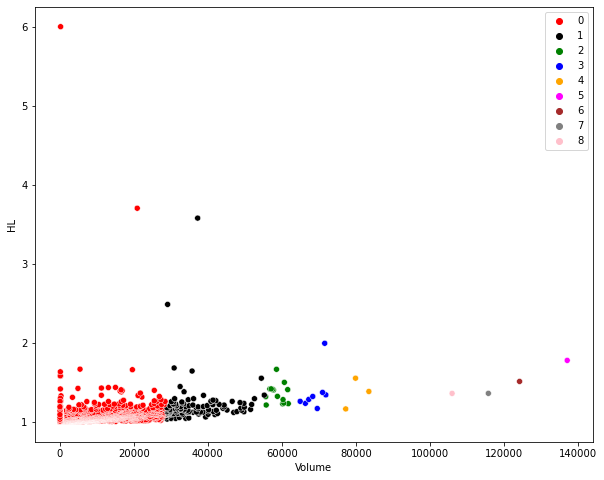

In [23]:
from sklearn.cluster import MeanShift

model = MeanShift(cluster_all=True)


model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green', 'blue', 'orange', 'magenta', 
                                                               'brown', 'grey', 'pink'])
plt.show()

# OPTICS

In [40]:


metrics =  ['braycurtis', 'canberra', 'chebyshev', 'minkowski', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


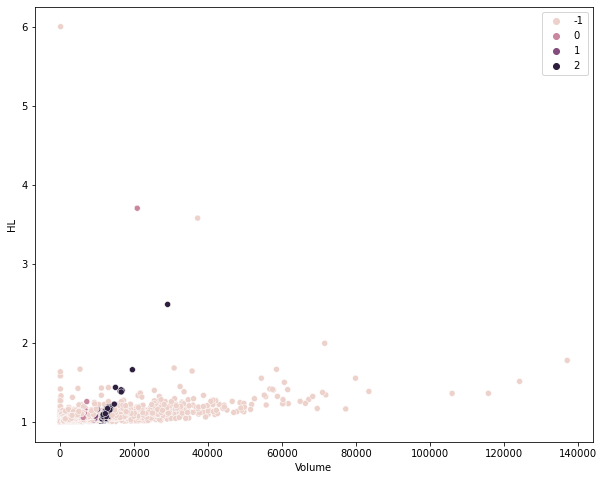

In [198]:
from sklearn.cluster import OPTICS

model = OPTICS(metric='cosine' , min_samples=95)


model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green', 'blue', 'orange', 'magenta', 
#                                                                'brown', 'grey', 'pink'])
plt.show()

# SpectralClustering

In [ ]:
assign_labels{‘kmeans’, ‘discretize’, ‘cluster_qr’}

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


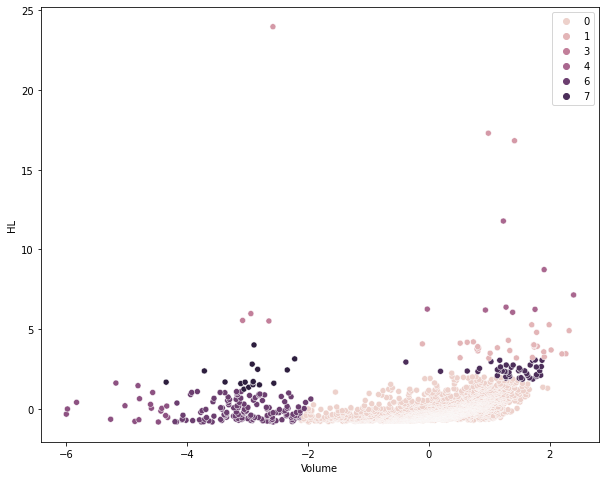

In [160]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=10, random_state=42, assign_labels='discretize')


model.fit(df1)
points = model.labels_
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# SpectralBiclustering

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


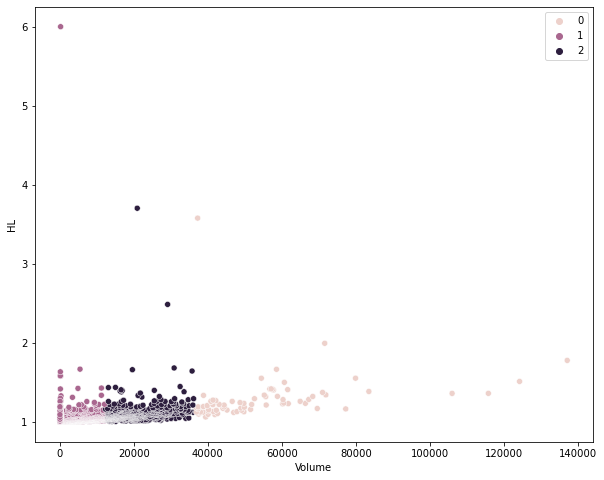

In [102]:
from sklearn.cluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=(3,2))


model.fit(df1)
points = model.row_labels_
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

# SpectralCoclustering

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


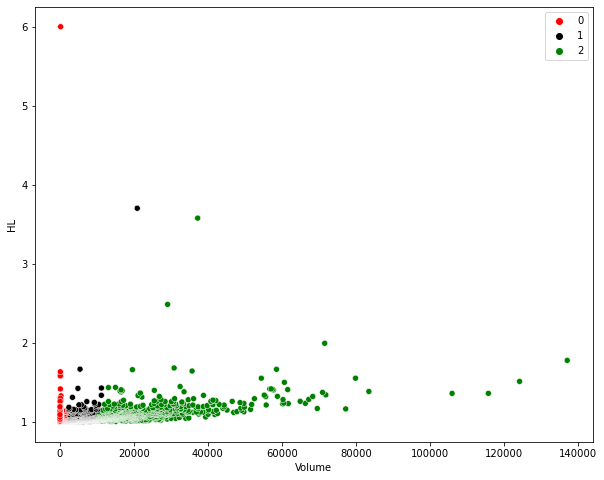

In [124]:
from sklearn.cluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=3, random_state=42, mini_batch=True, n_init=100)


model.fit(df1)
points = model.row_labels_
fig, ax = plt.subplots(figsize=(10, 8))
# sns.scatterplot(df1['Volume'], df1['HL'], hue=points)
sns.scatterplot(df1['Volume'], df1['HL'], hue=points , palette=['red', 'black', 'green'])
plt.show()

In [21]:
np.unique(points)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [537]:
df1

Volume        HL
0       395.462952  1.002024
1       180.683838  1.001972
2        37.137348  1.001770
3        46.964500  1.002079
4       611.212830  1.003992
...            ...       ...
3532    110.503334  1.636842
3533      2.356522  1.095238
3534  37205.886720  3.580000
3535  20889.470700  3.704857
3536    179.787262  6.000000

[3537 rows x 2 columns]

In [506]:
gaussian_result

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

График при eps = 0.2


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


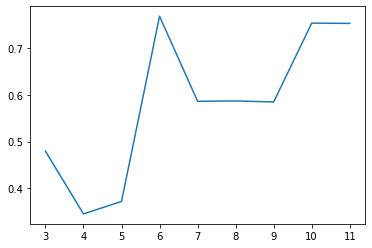

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


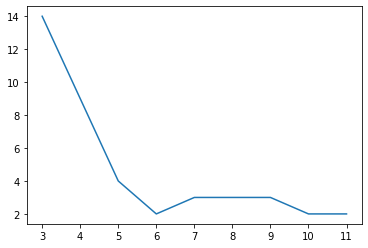

График при eps = 0.30000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


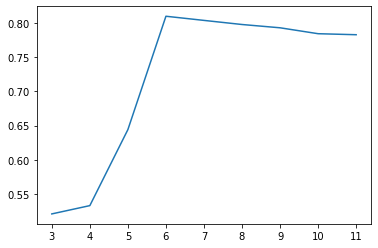

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


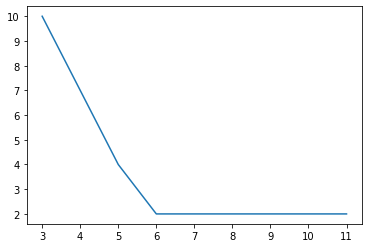

График при eps = 0.4000000000000001


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


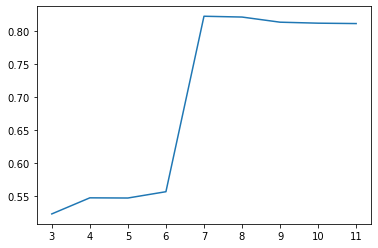

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


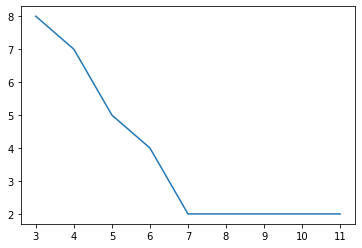

График при eps = 0.5000000000000001


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


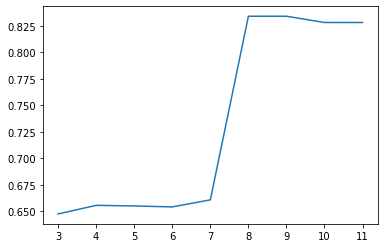

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


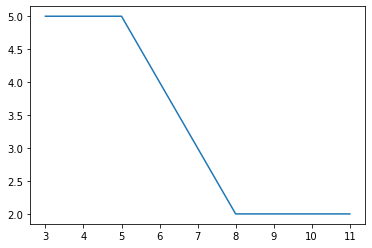

График при eps = 0.6000000000000001


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


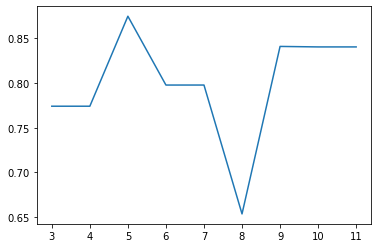

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


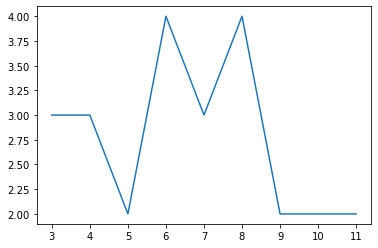

График при eps = 0.7000000000000002


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


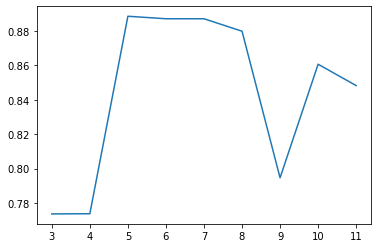

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


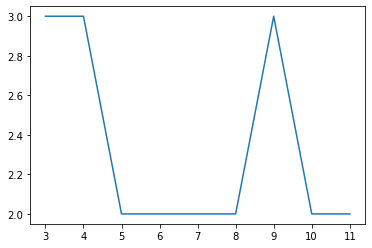

График при eps = 0.8000000000000003


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


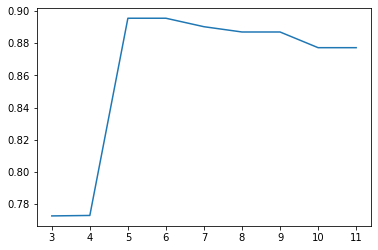

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


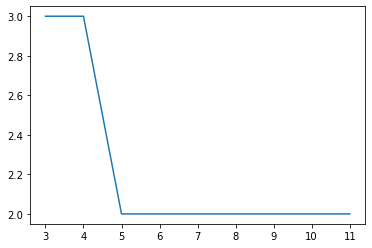

График при eps = 0.9000000000000001


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


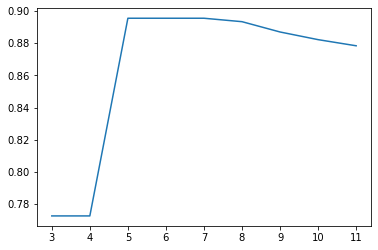

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


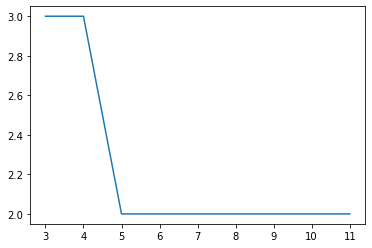

График при eps = 1.0000000000000002


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


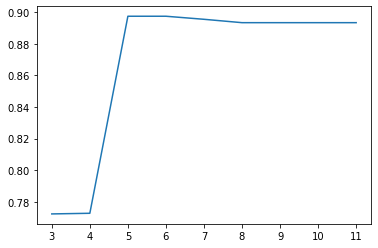

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


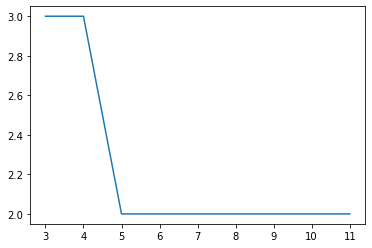

График при eps = 1.1000000000000003


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


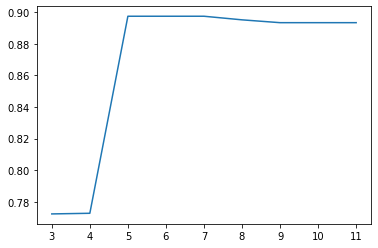

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


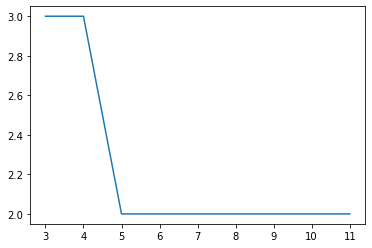

График при eps = 1.2000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


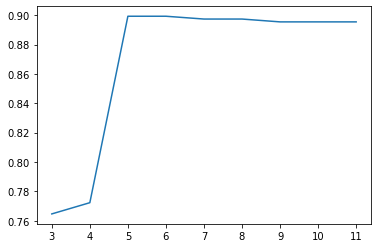

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


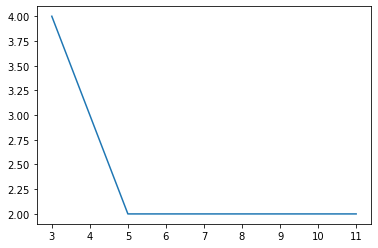

График при eps = 1.3000000000000003


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


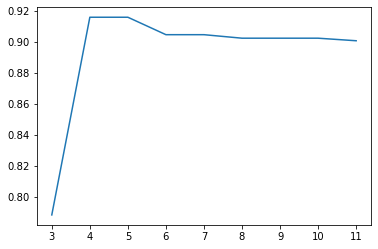

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


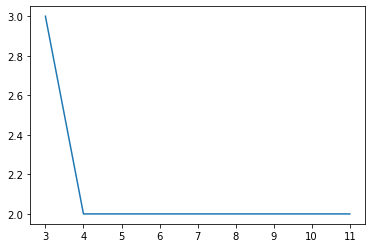

График при eps = 1.4000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


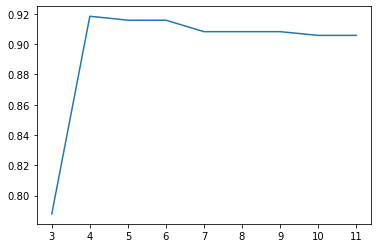

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


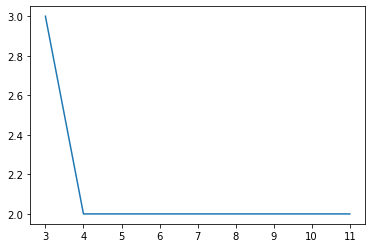

График при eps = 1.5000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


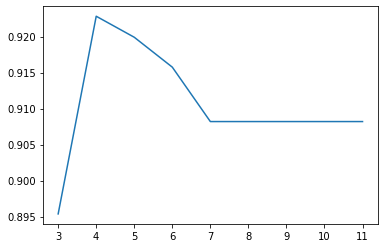

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


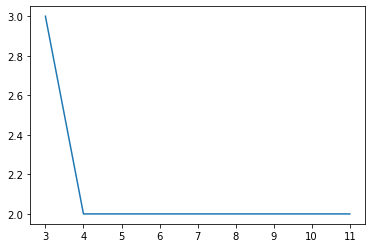

График при eps = 1.6000000000000003


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


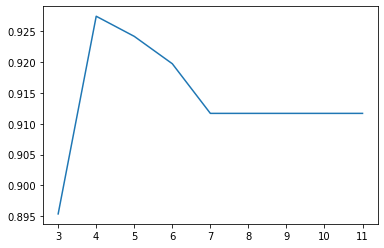

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


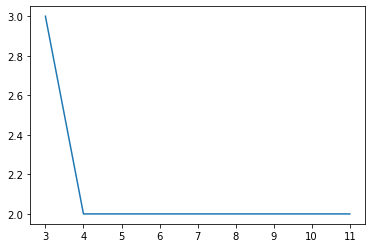

График при eps = 1.7000000000000004


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


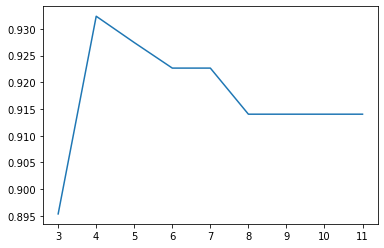

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


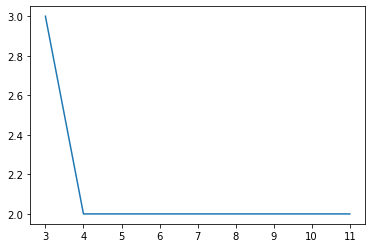

График при eps = 1.8000000000000005


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


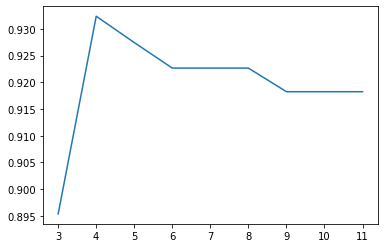

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


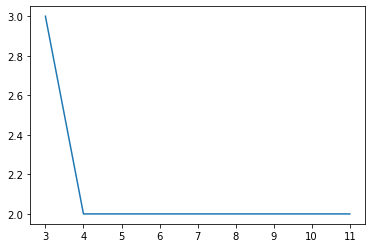

График при eps = 1.9000000000000006


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


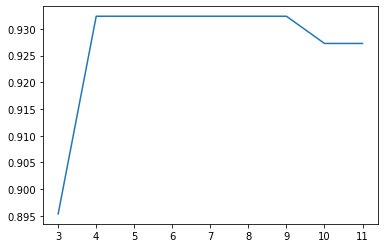

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


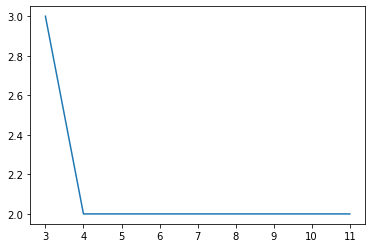

In [520]:
df_scaled = df1.copy()
eps_ = np.arange(0.2,2,0.1)
min_samples_ = np.arange(3,12,1)

for i in eps_:
    metrics = []
    labels = []
    for k in min_samples_:
        model = DBSCAN(eps=i, min_samples=k).fit(df_scaled)
        score = silhouette_score(df_scaled, model.labels_)
        metrics.append(score)
        labels.append(len(np.unique(model.labels_))) 
    print(f'График при eps = {i}')
    
    sns.lineplot(min_samples_, metrics);
    plt.show()
    sns.lineplot(min_samples_, labels);
   
    plt.show()

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


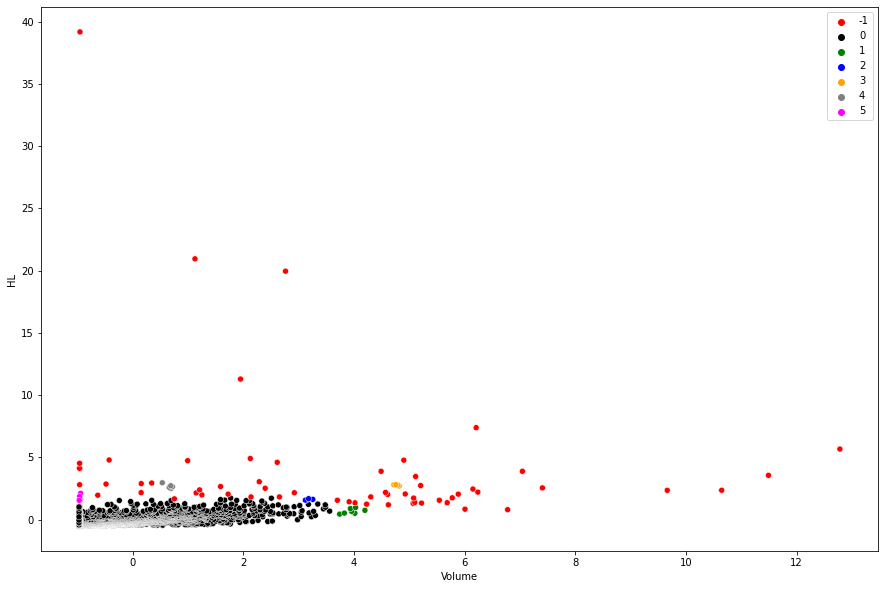

In [442]:
model = DBSCAN(eps=0.3, min_samples=4)
model.fit(df_scaled)
points = model.labels_
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points, palette=['red', 'black', 'green', 'blue', 'orange', 'grey', 'magenta'])
plt.show()

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


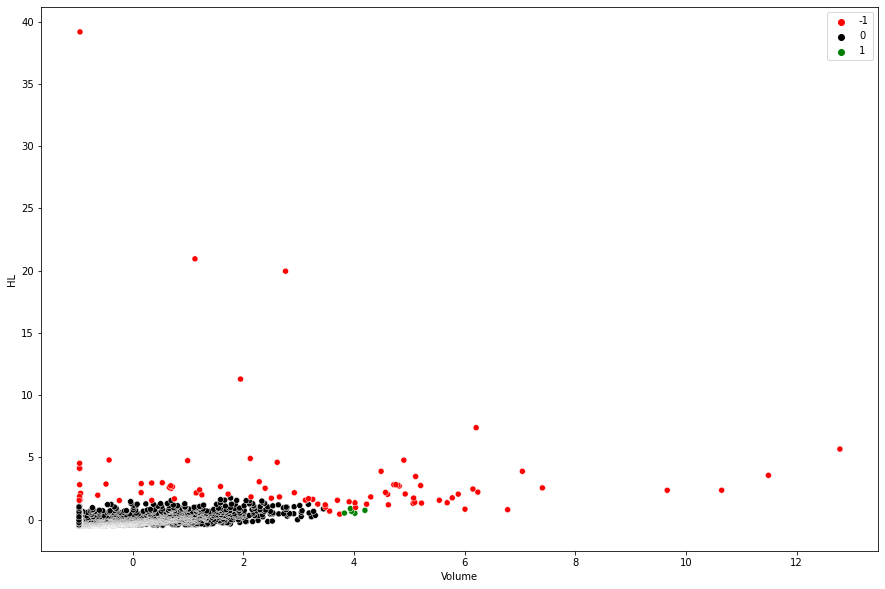

In [519]:
df_scaled = df1.copy()
eps_ = np.arange(0.01,0.1,0.01)
min_samples_ = np.arange(100,200,1)
for i in eps_:
    
    for k in min_samples_:
        
        model = DBSCAN(eps=i, min_samples=4)
        model.fit(df_scaled)
        points = model.labels_ 
        
        if len(np.unique(points)) == 3:
            print(f'График при eps = {i},  min_samples = {k}' )
            fig, ax = plt.subplots(figsize=(7, 3))
            sns.scatterplot(df1['Volume'], df1['HL'], hue=points, palette=['red', 'black', 'green'])
            plt.show()
    
    
   

KeyboardInterrupt: 

C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


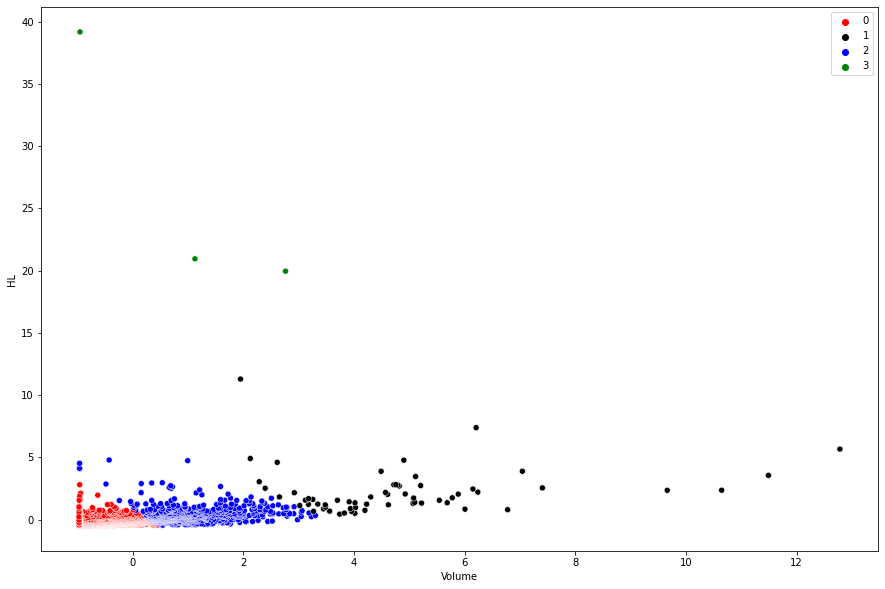

In [451]:
km = KMeans(n_clusters=4)


km.fit(df_scaled)

points = km.predict(df_scaled)
points = km.labels_
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(df1['Volume'], df1['HL'], hue=points, palette=['red', 'black', 'blue', 'green'])
plt.show()

Volume         HL
0    -0.927460  -0.520780
1    -0.949004  -0.521193
2    -0.963403  -0.522797
3    -0.962418  -0.520345
4    -0.905818  -0.505146
...        ...        ...
3532 -0.956044   4.522736
3533 -0.966892   0.219788
3534  2.764969  19.960783
3535  1.128280  20.952751
3536 -0.949094  39.187257

[3537 rows x 2 columns]

In [247]:
df1

volume  body
0        1.93  1.06
1        2.36  1.10
2      164.48  1.58
3       79.76  1.11
4        6.86  1.08
...       ...   ...
3532  4725.83  1.09
3533  5099.26  1.14
3534  3300.16  1.09
3535  3260.57  1.09
3536  1427.68  1.04

[3537 rows x 2 columns]

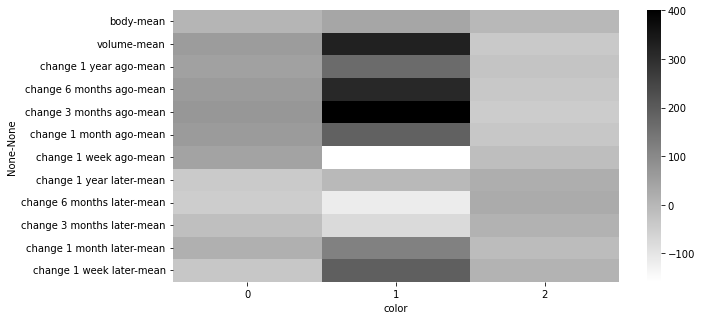

In [236]:
model = BayesianGaussianMixture(n_components=4)
model.fit(df1)

labels = model.predict(df1)
df['color'] = np.array(labels)
x = df[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later','color']]
features = x.drop(columns=['color']).columns



df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
functions = ['mean']

stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(0,3)

for i in np.arange(0,3):
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_g_rel[np.arange(0,3)], cmap='binary')
plt.show()


C:\Users\m.astoshonok\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


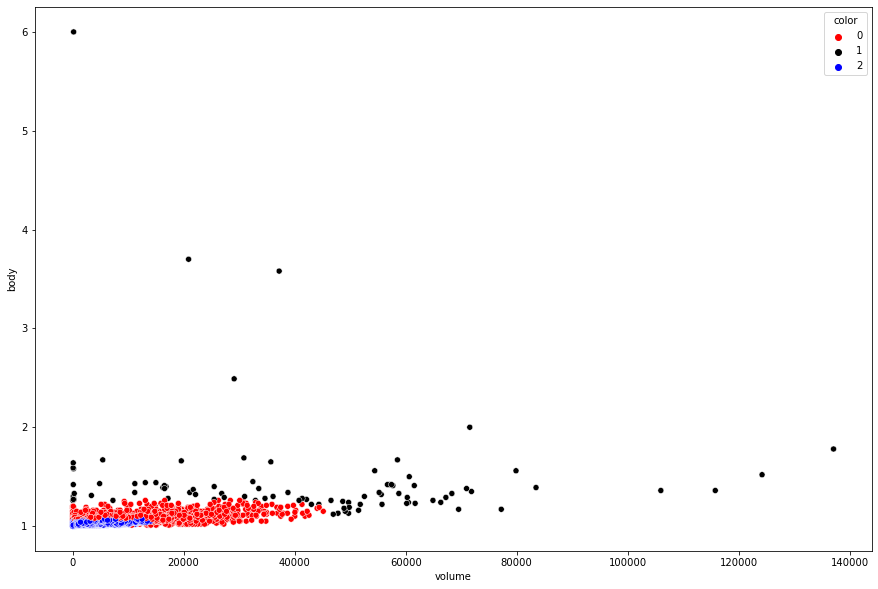

In [240]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(df['volume'], df['body'], hue=df['color'], palette=['red', 'black', 'blue'])
plt.show()

In [51]:
df['color'] = points
df.to_csv(path + "indicatorDBCSANF.csv")

In [257]:
model = DBSCAN(eps=0.5, min_samples=7)
model.fit(df1)

labels = model.predict(df1)
df['color'] = np.array(labels)
x = df[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later','color']]
features = x.drop(columns=['color']).columns



df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
functions = ['mean']

stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(0,3)

for i in np.arange(0,3):
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_g_rel[np.arange(0,3)], cmap='binary')
plt.show()


AttributeError: 'DBSCAN' object has no attribute 'predict'

In [242]:
file1 = 'BTC_HLnew.csv'
df2 = pd.read_csv(path + file1, parse_dates = ['Date/Time'], dayfirst = False)
df2

Ticker  Date/Time  Volume    HL
0    BTC-USD 2021-06-29  351653  1.07
1    BTC-USD 2021-06-30  305501  1.06
2    BTC-USD 2021-07-01  310499  1.07
3    BTC-USD 2021-07-02  251845  1.04
4    BTC-USD 2021-07-03  208252  1.05
..       ...        ...     ...   ...
550  BTC-USD 2023-01-05  379144  1.01
551  BTC-USD 2023-01-06  490511  1.02
552  BTC-USD 2023-01-07  215353  1.00
553  BTC-USD 2023-01-08  306648  1.01
554  BTC-USD 2023-01-09  641204  1.02

[555 rows x 4 columns]

In [245]:
df_p = df2[['Volume', 'HL']]
df_p

Volume    HL
0    351653  1.07
1    305501  1.06
2    310499  1.07
3    251845  1.04
4    208252  1.05
..      ...   ...
550  379144  1.01
551  490511  1.02
552  215353  1.00
553  306648  1.01
554  641204  1.02

[555 rows x 2 columns]

In [246]:
predict = model.predict(df_p)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

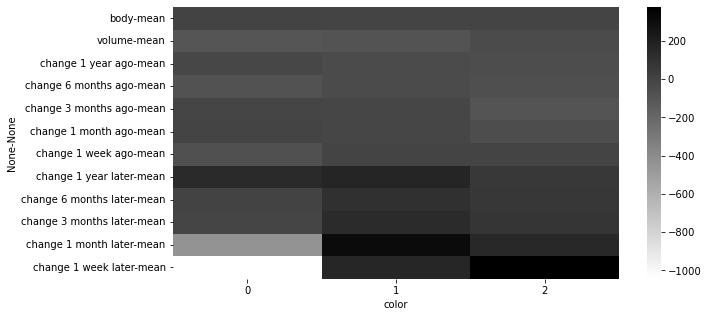

In [176]:
model = OPTICS(metric='canberra' , min_samples=35)
model.fit(df1)

labels = model.labels_
df['color'] = np.array(labels)
x = df[['body', 'volume', 'change 1 year ago', 'change 6 months ago',
       'change 3 months ago', 'change 1 month ago', 'change 1 week ago',
       'change 1 year later', 'change 6 months later', 'change 3 months later',
       'change 1 month later', 'change 1 week later','color']]
features = x.drop(columns=['color']).columns



df_g = x.groupby('color').agg({x: ['mean'] for x in features}).T
functions = ['mean']

stat = np.array([[x[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
cluster_labels = np.arange(0,3)

for i in np.arange(0,3):
    df_g_rel[i] = 100 * df_g_rel[i] / df_g_rel['Global'] - 100

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_g_rel[np.arange(0,3)], cmap='binary')
plt.show()


In [178]:
np.unique(labels)

array([-1,  0,  1,  2])

In [182]:
df1

volume  body
0        1.93  1.06
1        2.36  1.10
2      164.48  1.58
3       79.76  1.11
4        6.86  1.08
...       ...   ...
3532  4725.83  1.09
3533  5099.26  1.14
3534  3300.16  1.09
3535  3260.57  1.09
3536  1427.68  1.04

[3537 rows x 2 columns]